# Class Assignments (Element 1)
Manuela Cleves

Task 2

Note: each section includes all neccesary comments and justifications. At the end of the notebook all sources used are listed.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers.legacy import SGD
from tensorflow.keras.utils import to_categorical
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_text, plot_tree
from sklearn.metrics import accuracy_score, mean_squared_error
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Structure of this Notebook

1.  Reading the data

2.1 Finding missing values

2.2 Determining types of data and variables for each data set in order to understand what types of analysis are appropriate for each

3.1 Analysis of the Data(Music) Dataset:

    - Linearity:
        - Correlation matrix and heat map to determine potential linearity and relationships between variables (exploratory analysis)
        - Scatter plots to further analyze and compare these linear relationships and associations between specific pairs of variables (exploratory analysis)
    - Associations:
        - Multiple regression (inferential/predictive analysis) for variables that seem to have incidence on another (DV and IVs) as a tool to continue exploring the  magnitud and direction of the relationship as well as a prediction tool for values of the selected DV.
    - Loss Function:
        - Categorical Cross-Entropy function to determine how much distance there is between the regression predicted values and actual values
    - Scenario of overfitting simulated for a classification problem
    - Regularization of scenario of overfitting for a classification problem
    - Kernel transformation to linear space, model fit and accuracy assessment 


3.2 Analysis of the Housing Dataset:

    - Correlation matrix and heat map to determine potential linearity and relationships between continuous variables (exploratory analysis)
    - KNN algorithm as a predictive tool to determine if the price of a house can be predictic using categorical values like wether or not there's a basement
    - Appropriate Loss functions to determine how much distance there is between the KNN predicted values and actual values
    - Evaluation techniques to select the most appropriate Loss function

3.2 Analysis of the Wine Dataset:

    - Correlation matrix and heat map to determine potential linearity and relationships between variables (exploratory analysis)
    - Scatter plots to further analyze and compare these linear relationships and associations between specific pairs of variables (exploratory analysis)
    - Multiple regression (inferential/predictive analysis) for variables that seem to have incidence on another (DV and IVs) as a tool to continue exploring the  magnitud and direction of the relationship as well as a prediction tool for values of the selected DV.
    - Appropriate Loss functions to determine how much distance there is between the regression predicted values and actual values
    - Evaluation techniques to select the most appropriate Loss function
    - Scenario of overfitting simulated for a linear data set
    - Regularization of scenario of overfitting for a linear data set
    - Decision Tree - with and without pruning
    
3.2 Analysis of the Master Dataset:

    - Correlation matrix and heat map to determine potential linearity and relationships between variables (exploratory analysis)
    - Scatter plots to further analyze and compare these linear relationships and associations between specific pairs of variables (exploratory analysis)
    - We won't conduct regressions because we've already done them for the previous task of this assignment
    - Decision Tree - with and without pruning

# 1. Reading the data

In [2]:
# Reading the data and converting it to a data frame
dfMaster= pd.read_csv("../FinalClassAssignment/MASTER_PhonesmartdataAll_CCI_AdvStats.csv")
dfData= pd.read_csv("../FinalClassAssignment/data.csv")
dfHousing= pd.read_csv("../FinalClassAssignment/Housing.csv")
dfWine= pd.read_csv("../FinalClassAssignment/wine_data.csv")

# 2.1 Finding missing values

In [3]:
#We must first check for missing values in all four data sets

total_missing_values = dfData.isnull().sum().sum()
print("Total number of missing values in dfData:", total_missing_values)
missing_values_per_column = dfData.isnull().sum()
print("Number of missing values for each column in dfData:")
print(missing_values_per_column)
print(" ")
total_missing_values = dfHousing.isnull().sum().sum()
print("Total number of missing values in dfHousing:", total_missing_values)
missing_values_per_column = dfHousing.isnull().sum()
print("Number of missing values for each column in dfHousing:")
print(missing_values_per_column)
print(" ")
total_missing_values = dfWine.isnull().sum().sum()
print("Total number of missing values in dfWine:", total_missing_values)
missing_values_per_column = dfWine.isnull().sum()
print("Number of missing values for each column in dfWine:")
print(missing_values_per_column)
print(" ")
total_missing_values = dfMaster.isnull().sum().sum()
print("Total number of missing values in dfMaster:", total_missing_values)
missing_values_per_column = dfMaster.isnull().sum()
print("Number of missing values for each column in dfMaster:")
print(missing_values_per_column)

Total number of missing values in dfData: 0
Number of missing values for each column in dfData:
filename              0
tempo                 0
beats                 0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64
 
Total number of missing values in dfHousing: 0
Number of missing values for each column in dfHousing:
price               0
area                0
bedrooms            0
b

**Conclusion:** no data sets have missing values. The Original Master dataset had missing values but they were already apporpriately imputed or deleted in the frist task of this assignment. 

# 2.2 Determining types of data and variables

To determine the type of data and variables that we are dealing with we will look at two things:
1) The data type (int, string, etc.)
2) The type of variable (continuous, discrete, categorical, etc.)

In [4]:
#First, we will look at data types
print(dfData.dtypes)

filename               object
tempo                 float64
beats                   int64
chroma_stft           float64
rmse                  float64
spectral_centroid     float64
spectral_bandwidth    float64
rolloff               float64
zero_crossing_rate    float64
mfcc1                 float64
mfcc2                 float64
mfcc3                 float64
mfcc4                 float64
mfcc5                 float64
mfcc6                 float64
mfcc7                 float64
mfcc8                 float64
mfcc9                 float64
mfcc10                float64
mfcc11                float64
mfcc12                float64
mfcc13                float64
mfcc14                float64
mfcc15                float64
mfcc16                float64
mfcc17                float64
mfcc18                float64
mfcc19                float64
mfcc20                float64
label                  object
dtype: object


In [5]:
print(dfHousing.dtypes)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [6]:
print(dfWine.dtypes)

Unnamed: 0                        int64
alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object


In [7]:
print(dfMaster.dtypes)

Year                           int64
Age                           object
GenderNum                     object
AutismQuotient                object
STAI                          object
BRIEF_Total                   object
Device                        object
DailyAvgMins                  object
DailyAvePickups               object
VS_RT_correct_Conjunction    float64
VS_RT_correct_Single         float64
dtype: object


In [8]:
# Next, we will look at the type of variables we are dealing with

In [9]:
dfData.value_counts()

filename        tempo       beats  chroma_stft  rmse      spectral_centroid  spectral_bandwidth  rolloff      zero_crossing_rate  mfcc1        mfcc2       mfcc3       mfcc4      mfcc5       mfcc6       mfcc7       mfcc8       mfcc9       mfcc10      mfcc11      mfcc12      mfcc13      mfcc14      mfcc15     mfcc16     mfcc17     mfcc18     mfcc19     mfcc20     label
blues.00000.au  123.046875  61     0.349943     0.130225  1784.420446        2002.650192         3806.485316  0.083066            -113.596742  121.557302  -19.158825  42.351029  -6.376457    18.618875  -13.697911   15.344630  -12.285266   10.980491  -8.324323    8.810668   -3.667367    5.751690   -5.162761   0.750947  -1.691937  -0.409954  -2.300208   1.219928  blues    1
metal.00071.au  86.132812   39     0.479849     0.115337  2807.988285        2407.516308         5674.107356  0.153805            -78.616550   80.881310   -24.588960  47.025623  -23.750776   27.422908  -17.429368   22.270751  -13.535820   21.573226  -11.1

In [10]:
dfHousing.value_counts()

price     area   bedrooms  bathrooms  stories  mainroad  guestroom  basement  hotwaterheating  airconditioning  parking  prefarea  furnishingstatus
1750000   2910   3         1          1        no        no         no        no               no               0        no        furnished           1
5229000   7085   3         1          1        yes       yes        yes       no               no               2        yes       semi-furnished      1
5110000   11410  2         1          2        yes       no         no        no               no               0        yes       furnished           1
5145000   3410   3         1          2        no        no         no        no               yes              0        no        semi-furnished      1
          7980   3         1          1        yes       no         no        no               no               1        yes       semi-furnished      1
                                                                                       

In [11]:
dfWine.value_counts()

Unnamed: 0  alcohol  malic_acid  ash   alcalinity_of_ash  magnesium  total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity  hue   od280/od315_of_diluted_wines  proline
0           14.23    1.71        2.43  15.6               127.0      2.80           3.06        0.28                  2.29             5.64             1.04  3.92                          1065.0     1
133         12.70    3.55        2.36  21.5               106.0      1.70           1.20        0.17                  0.84             5.00             0.78  1.29                          600.0      1
113         11.41    0.74        2.50  21.0               88.0       2.48           2.01        0.42                  1.44             3.08             1.10  2.31                          434.0      1
114         12.08    1.39        2.50  22.5               84.0       2.56           2.29        0.43                  1.04             2.90             0.93  3.19                          385.0      1


In [12]:
#We must ensure all cagtegorical strings are defined as categorical values (wether they have 2 or 3 levels) and all numerican values are defined as int or float

In [13]:
dfData['label'] = dfData['label'].astype('category')

dfHousing['mainroad']=dfHousing['mainroad'].astype('category')
dfHousing['basement']=dfHousing['basement'].astype('category')
dfHousing['hotwaterheating']=dfHousing['basement'].astype('category')          
dfHousing['airconditioning']=dfHousing['basement'].astype('category')
dfHousing['prefarea']=dfHousing['basement'].astype('category')
dfHousing['furnishingstatus']=dfHousing['basement'].astype('category')
dfHousing['guestroom']=dfHousing['guestroom'].astype('category')

dfMaster['Device']=dfMaster['Device'].astype('category')

In [14]:
dfMaster = dfMaster.apply(pd.to_numeric,errors='coerce')

In [15]:
#Now, we will ensure we've classified our data correctly, we already know that our numeric data is classified correctly

In [16]:
print(dfData.dtypes)

filename                object
tempo                  float64
beats                    int64
chroma_stft            float64
rmse                   float64
spectral_centroid      float64
spectral_bandwidth     float64
rolloff                float64
zero_crossing_rate     float64
mfcc1                  float64
mfcc2                  float64
mfcc3                  float64
mfcc4                  float64
mfcc5                  float64
mfcc6                  float64
mfcc7                  float64
mfcc8                  float64
mfcc9                  float64
mfcc10                 float64
mfcc11                 float64
mfcc12                 float64
mfcc13                 float64
mfcc14                 float64
mfcc15                 float64
mfcc16                 float64
mfcc17                 float64
mfcc18                 float64
mfcc19                 float64
mfcc20                 float64
label                 category
dtype: object


In [17]:
print(dfHousing.dtypes)

price                  int64
area                   int64
bedrooms               int64
bathrooms              int64
stories                int64
mainroad            category
guestroom           category
basement            category
hotwaterheating     category
airconditioning     category
parking                int64
prefarea            category
furnishingstatus    category
dtype: object


In [18]:
print(dfWine.dtypes)

Unnamed: 0                        int64
alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object


In [19]:
print(dfMaster.dtypes)

Year                           int64
Age                          float64
GenderNum                    float64
AutismQuotient               float64
STAI                         float64
BRIEF_Total                  float64
Device                       float64
DailyAvgMins                 float64
DailyAvePickups              float64
VS_RT_correct_Conjunction    float64
VS_RT_correct_Single         float64
dtype: object


**Conclusion:**

From this we can conclude that we are dealing with the following types of variables for each data set:

**dfData:** all variables are continuos and numeric except for "label" which is a categorical string and "beats" which is discrete (numerical).

**dfHousing:** 

- "price" and "area" are continuous variables
- "bedrooms", "bathrooms", "stories" and "parking" are discrete (numerical)
- "mainroad", "basement", "hotwaterheating", "airconditioning" and "prefarea" are categorical (binary)
- "furnishingstatues" is categorical (with 3 levels - multi)

**dfWine:** All variables are continuous except proline which is discrete.
    
**dfMaster:** From our previous task we know that these are the types of variables:

# 3.1 DATA (MUSIC) - ANALYSIS 

Since all variables are continuous, we started out by creating a correlation matrix and a heat map. This will allow us to detect linearity between variables with a high correlation. We can later confirm this by plotting scatter plots between those variables. (exploratory analysis technique)

Then, we moved on to create a multiple regression model to further explore the relationship between highly correlated variables identified in the heat map. We also plotted the residuals against the fitted model (inferential analysis techniques).

For our Loss functions we have picked the Categorial Cross-Entropy with SDG because we are dealing with a categorical variable that we want to predict (music genre), given a set of continuous and categorical variables. We will conduct the following to test the appropriateness of the model:

1) Accuracy: This metric is suitable for multiclass classification problems. It measures the overall correctness of the model's predictions, including for Categorial cross-Entropy with SDG.

2) Precision, Recall, and F1-Score: These metrics provide a more detailed analysis of the model's performance for each class. They are particularly useful when dealing with imbalanced datasets or when different classes have different levels of importance.

3) Confusion Matrix: The confusion matrix breaks down the model's predictions into true positives, true negatives, false positives, and false negatives for each class. It gives a clear picture of the model's performance on individual classes (how likely false positives are for example, or false negatives, etc.).

## Correlation matrix, heatmap and scatterplots

                       tempo     beats  chroma_stft      rmse  \
tempo               1.000000  0.966179     0.030640 -0.043503   
beats               0.966179  1.000000     0.080684  0.004607   
chroma_stft         0.030640  0.080684     1.000000  0.499577   
rmse               -0.043503  0.004607     0.499577  1.000000   
spectral_centroid  -0.014415  0.035843     0.615524  0.509984   
spectral_bandwidth -0.039283  0.011287     0.517482  0.529768   
rolloff            -0.020564  0.033489     0.597910  0.537718   
zero_crossing_rate  0.019935  0.056517     0.554735  0.332119   
mfcc1               0.011271  0.082156     0.659294  0.807260   
mfcc2               0.007200 -0.041055    -0.598495 -0.483765   
mfcc3              -0.097491 -0.099869    -0.054431  0.139339   
mfcc4               0.029352  0.063518     0.264226  0.008695   
mfcc5              -0.082223 -0.095422    -0.010116  0.108700   
mfcc6               0.043894  0.088048     0.416953  0.125782   
mfcc7              -0.083

<function matplotlib.pyplot.show(close=None, block=None)>

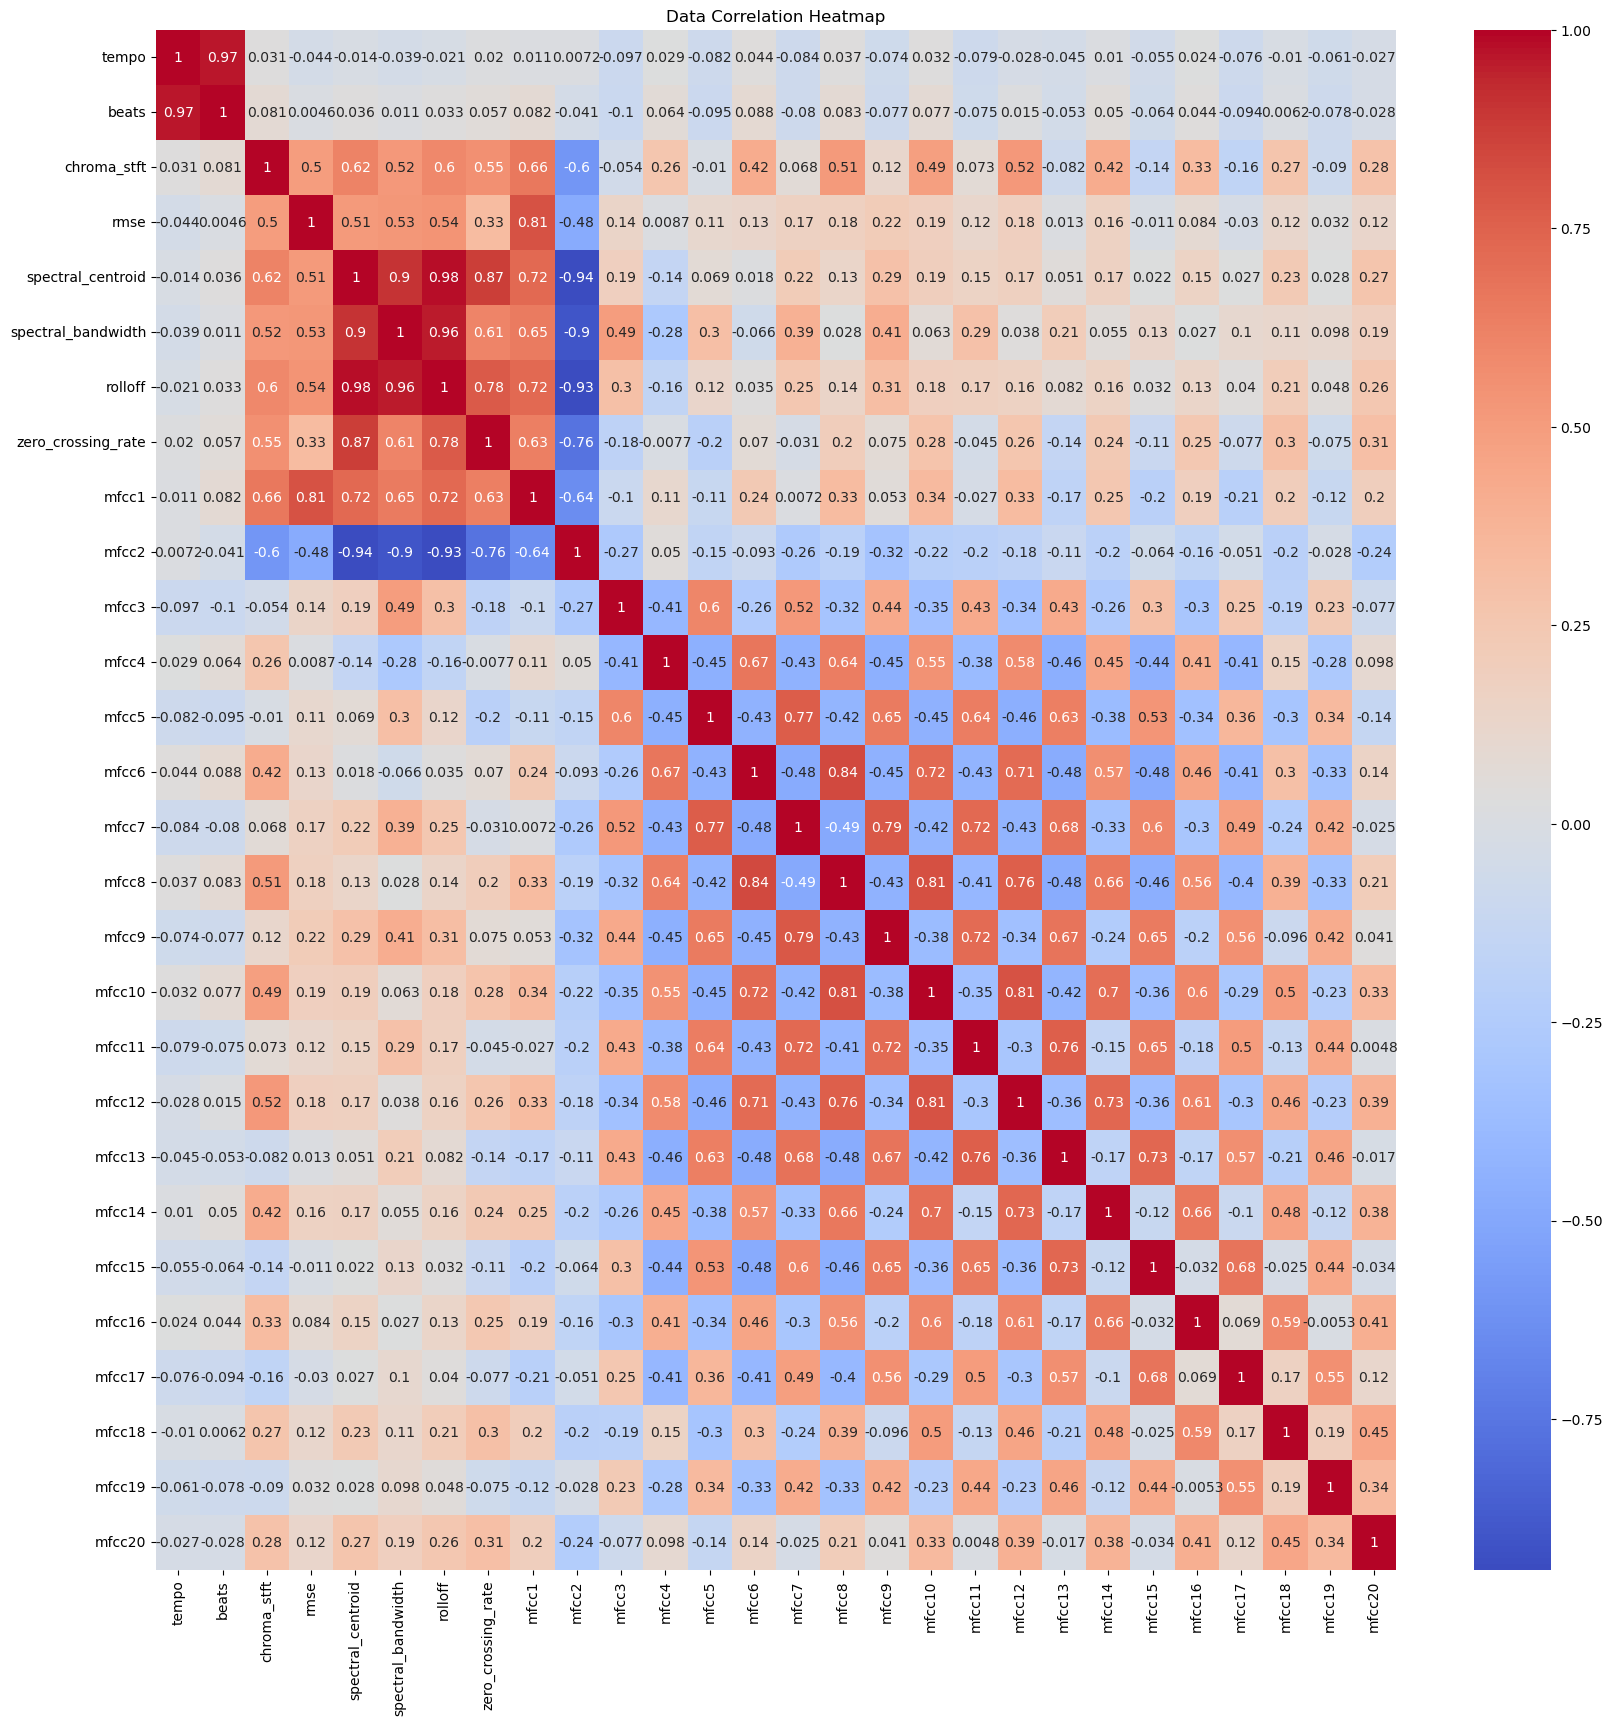

In [20]:
# Columns to ignore in correlation matrix
dataCategoric = ['label','filename']

# Exclude columns to ignore from the correlation matrix
columns_for_correlation = [col for col in dfData.columns if col not in dataCategoric]
correlation_matrixData = dfData[columns_for_correlation].corr()
print(correlation_matrixData)
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrixData, xticklabels=correlation_matrixData.columns, yticklabels=correlation_matrixData.columns, cmap='coolwarm', annot=True)
plt.title("Data Correlation Heatmap")
plt.show

**Conclusions on linearity:**
We can definitely conclude that there are strong relationships and associations between variables on the upper left hand corner of our correlation matrix. However, there are bizarre patterns in this matrix which may indicate that the data is not linear.

Just by looking at it we can group these high correlations in 3 levels: those that are almost 1 and are therefore VERY strong, those that are in dark orange and those that are in light orange. We will visualize these independent relationships between highly correlated variables in scatterplots before conducting a multiple regression in order to have a closer look. 

## Open to view all scatterplots for correlations greater than 0.6

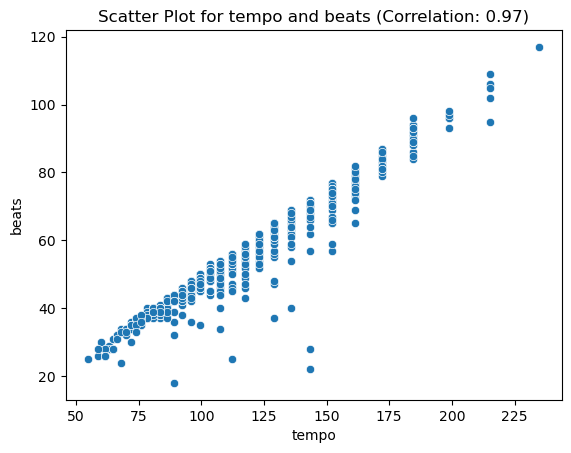

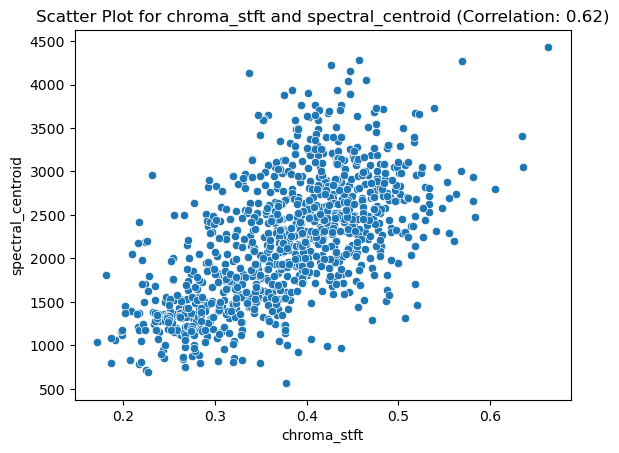

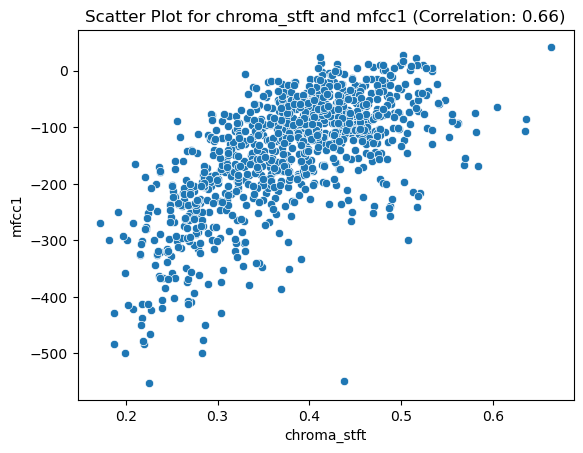

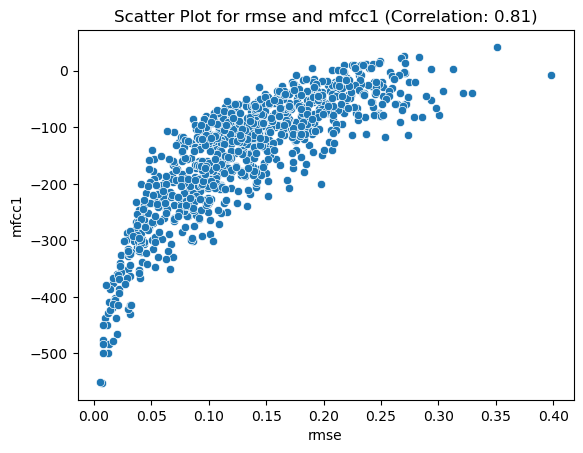

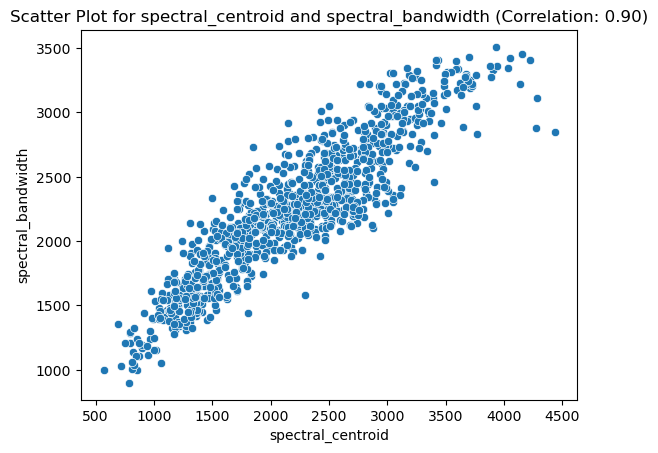

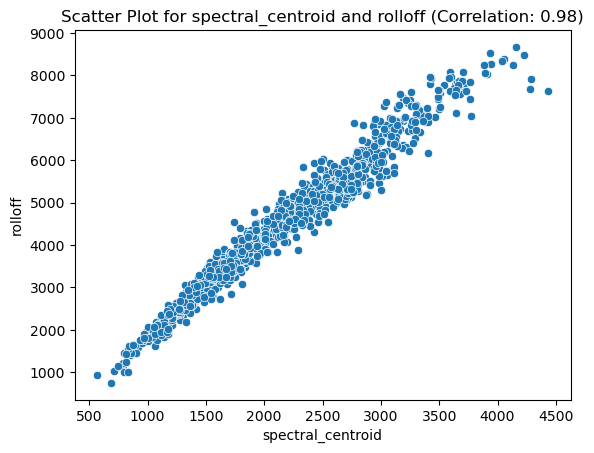

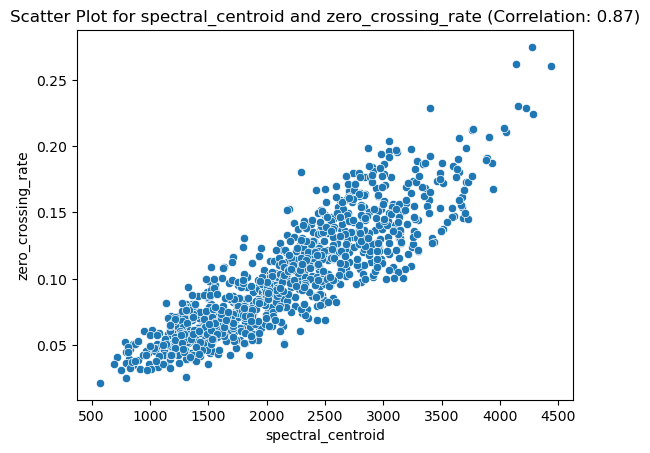

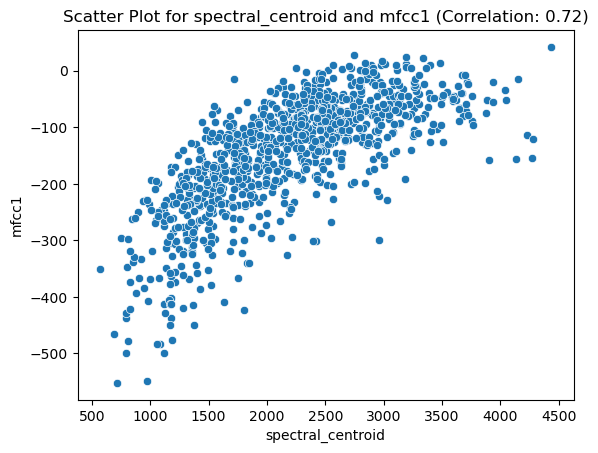

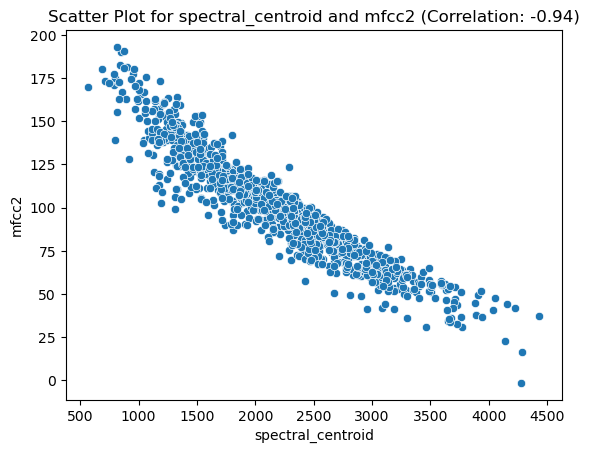

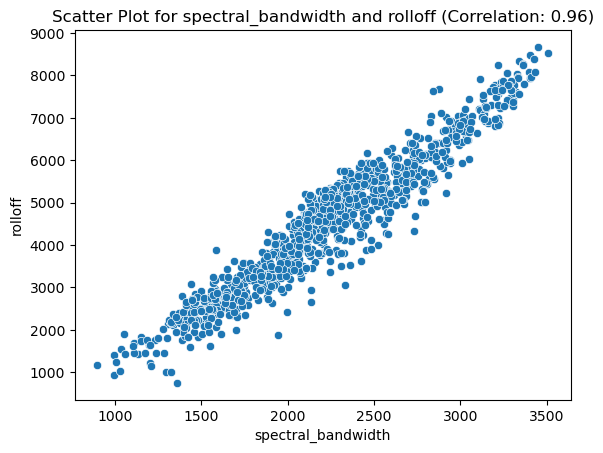

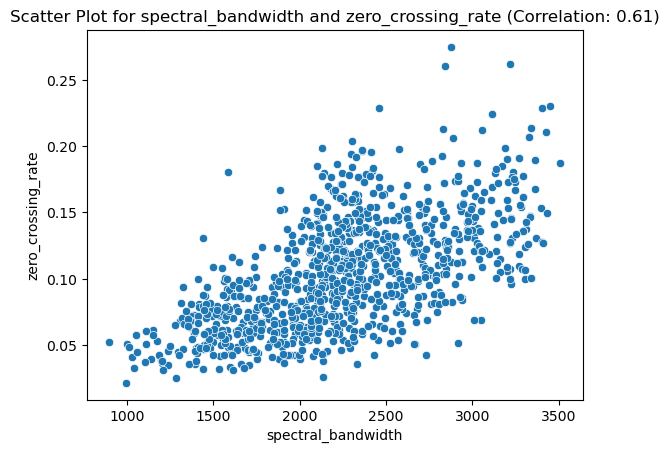

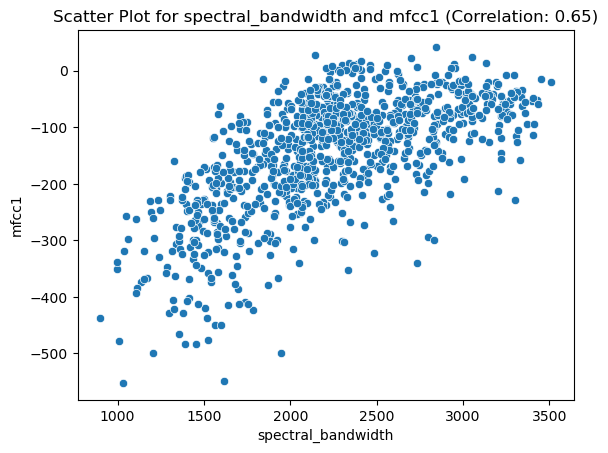

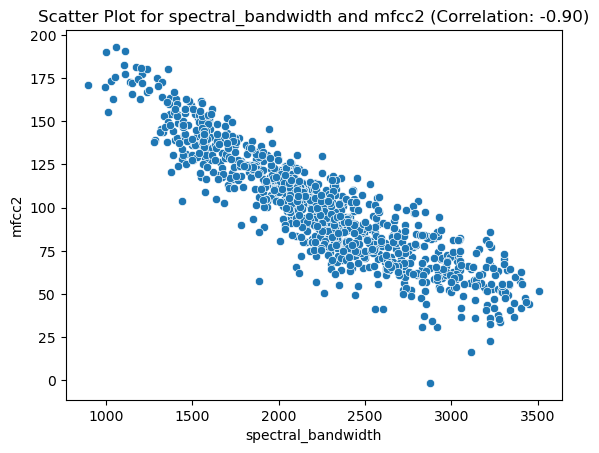

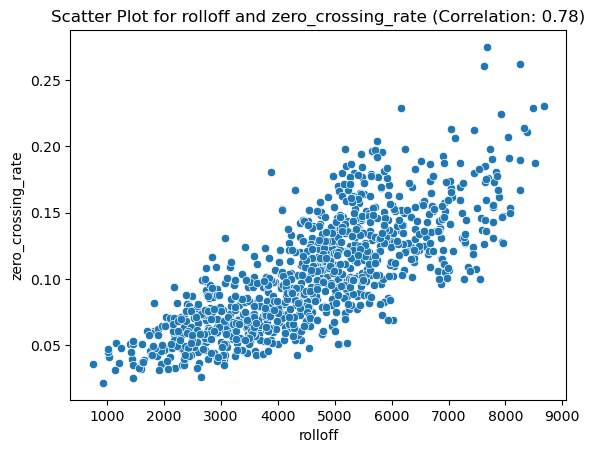

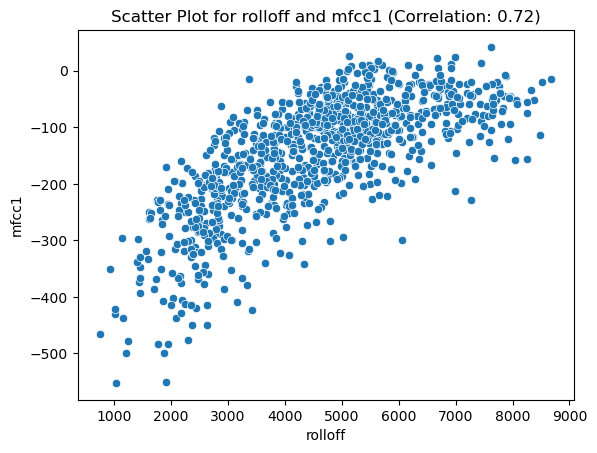

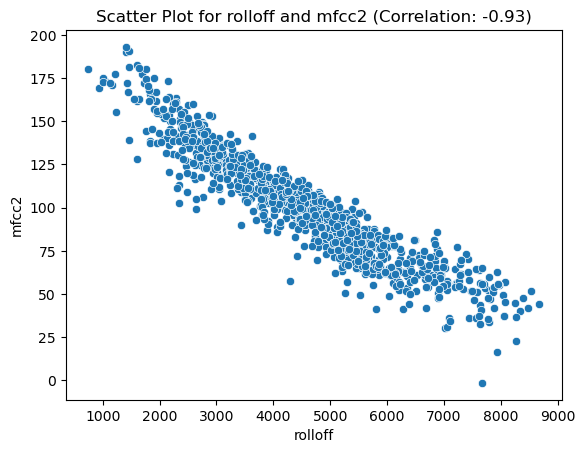

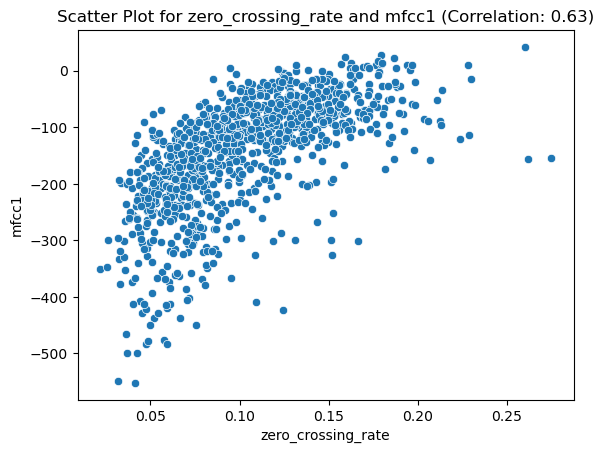

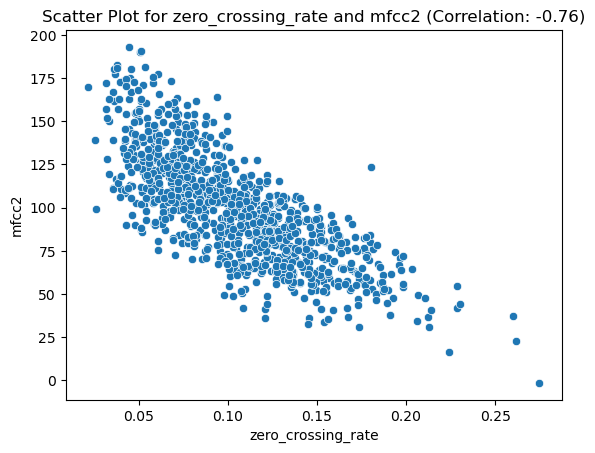

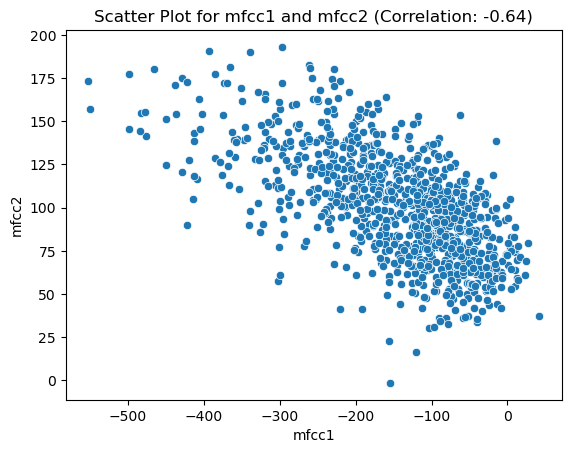

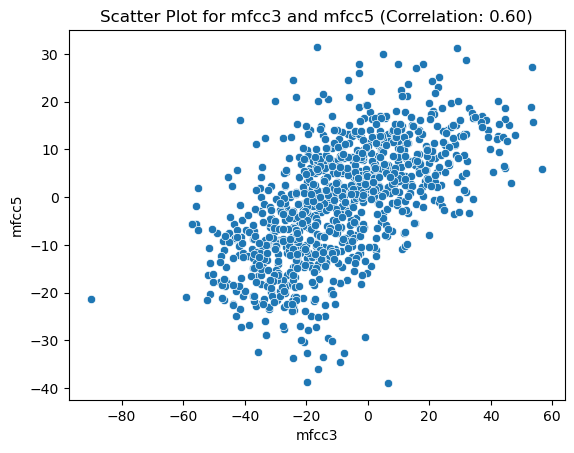

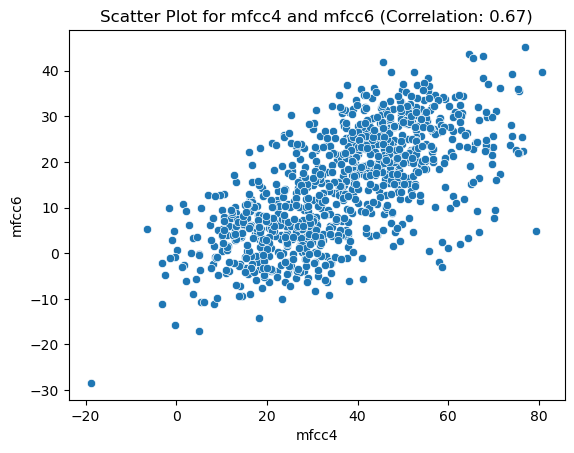

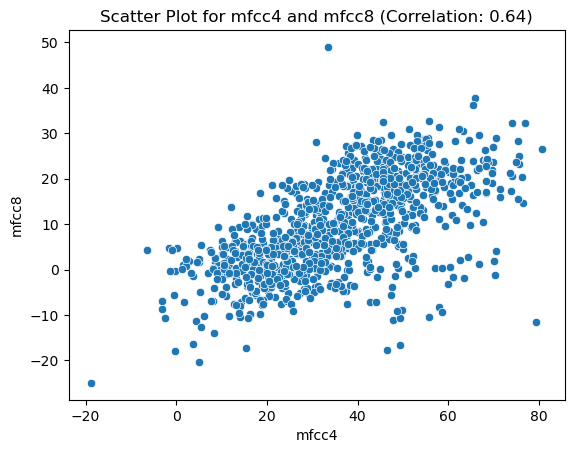

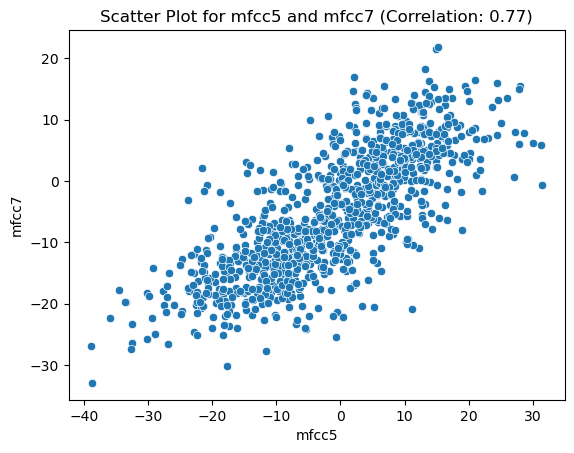

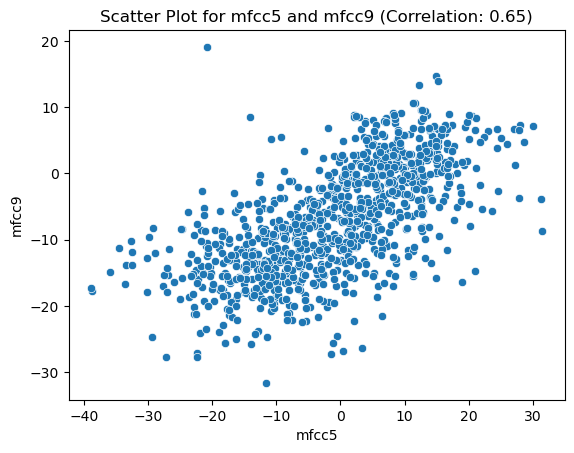

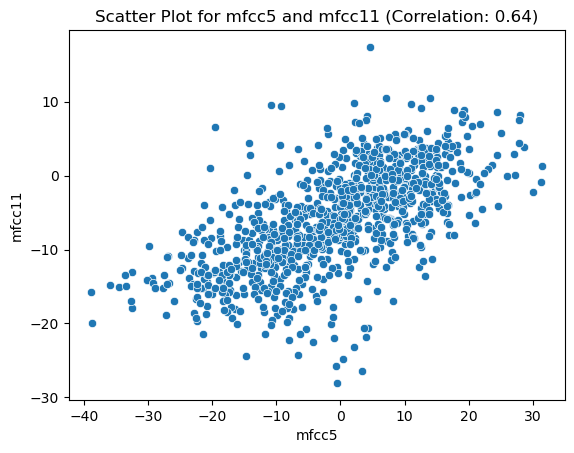

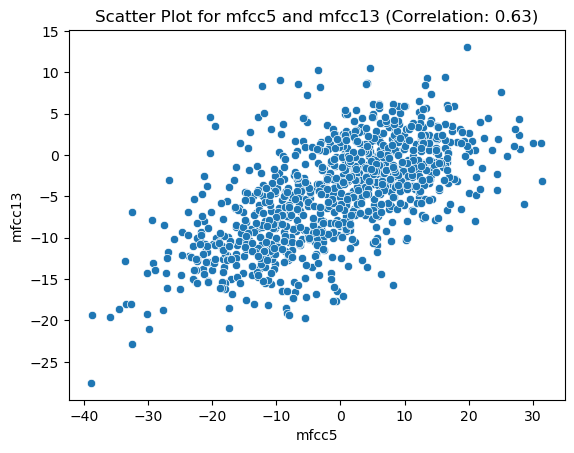

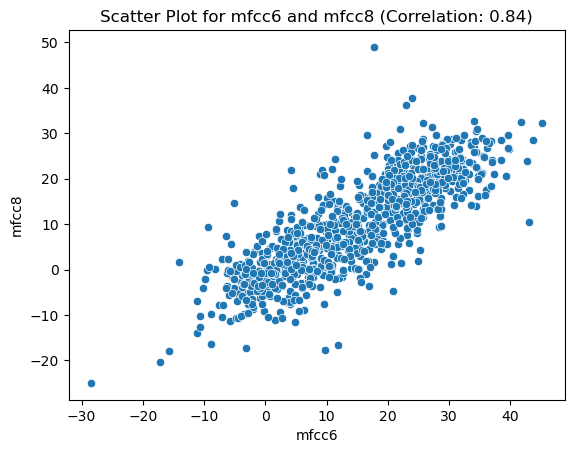

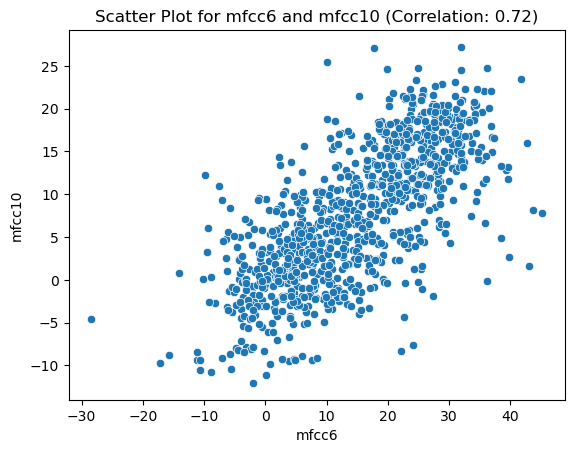

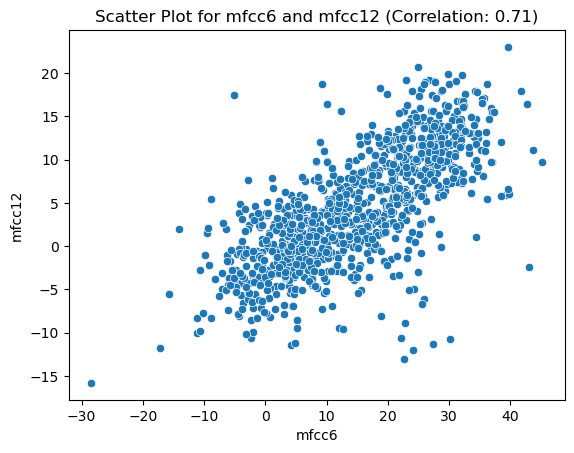

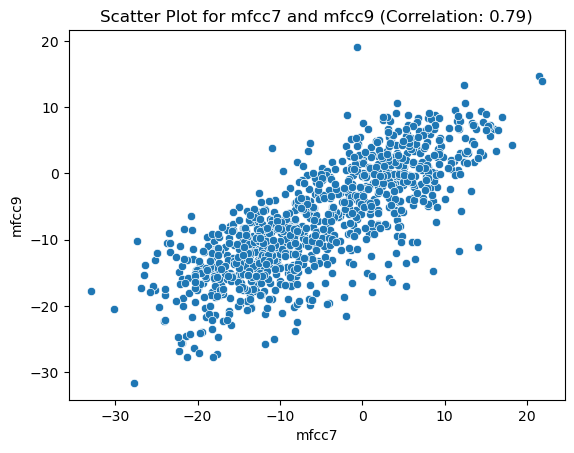

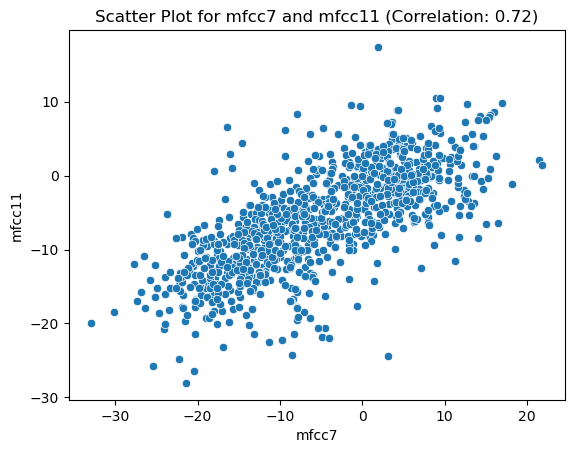

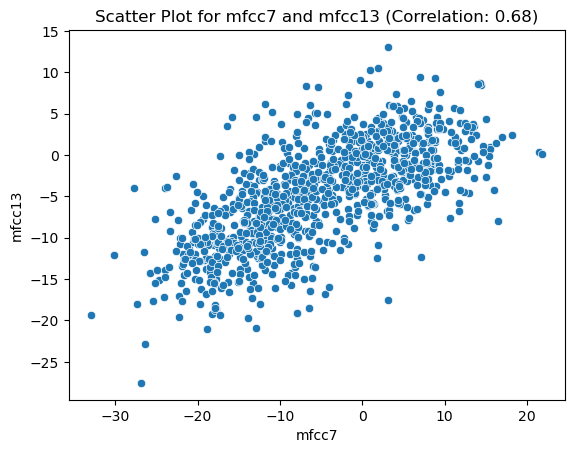

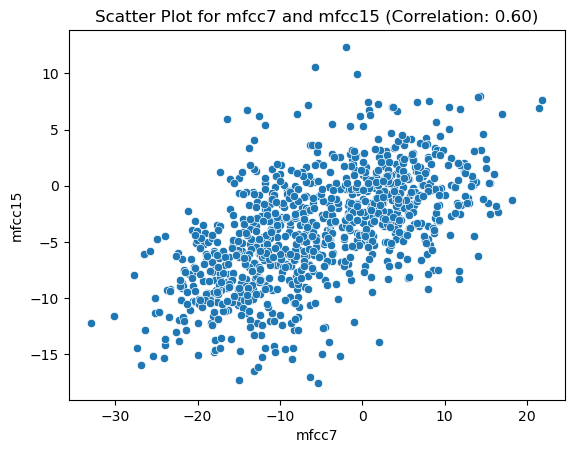

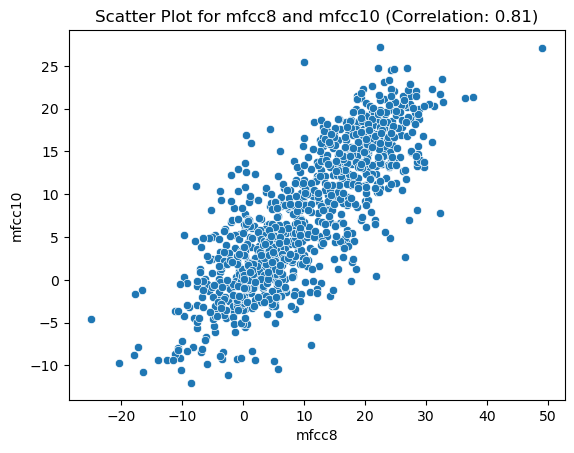

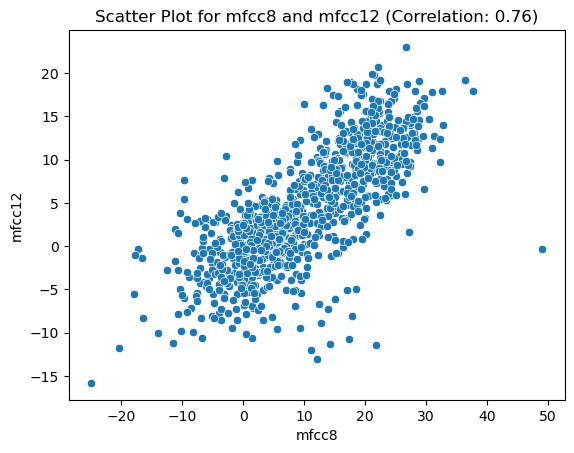

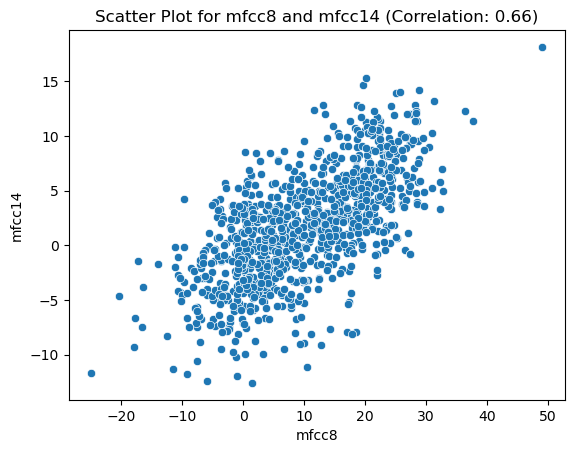

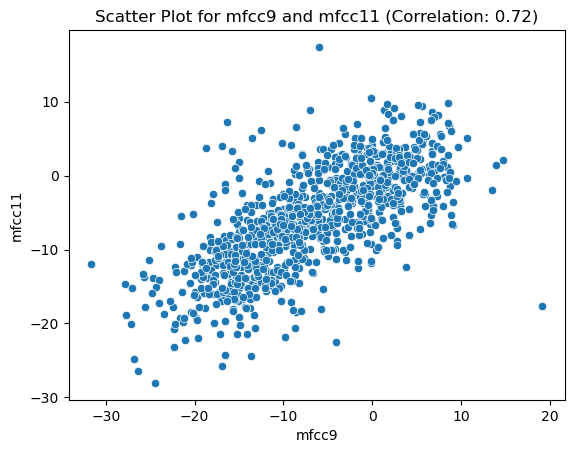

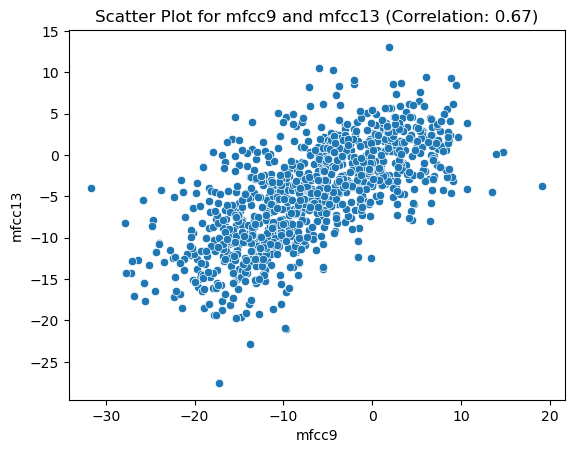

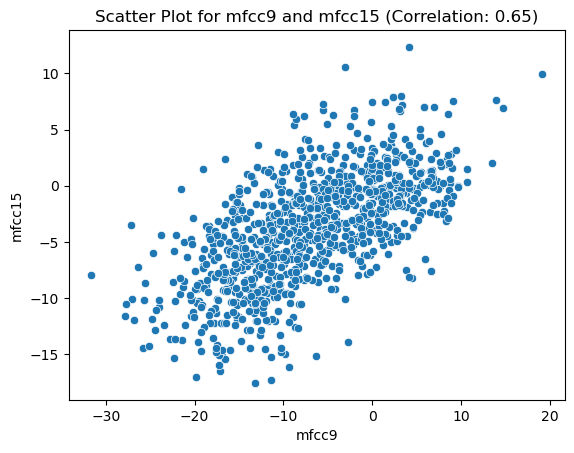

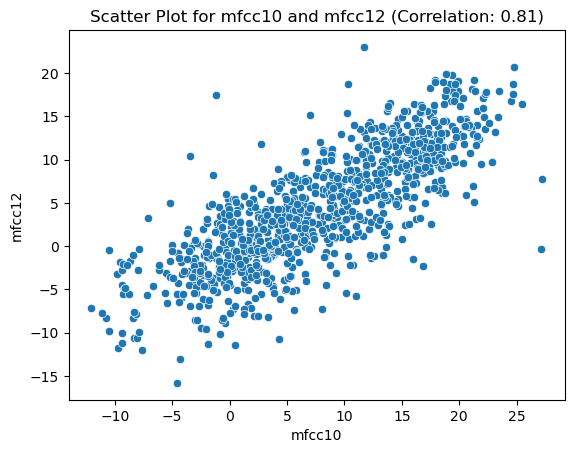

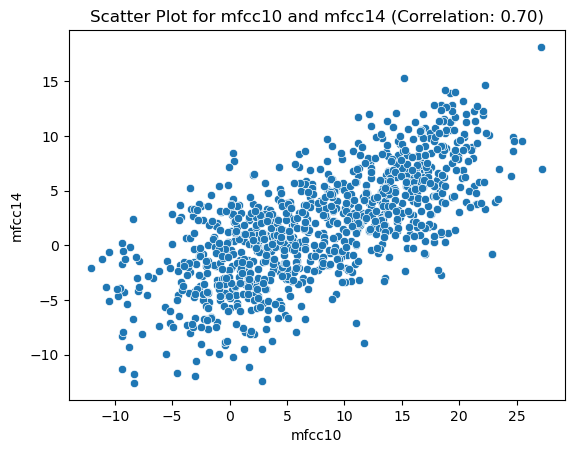

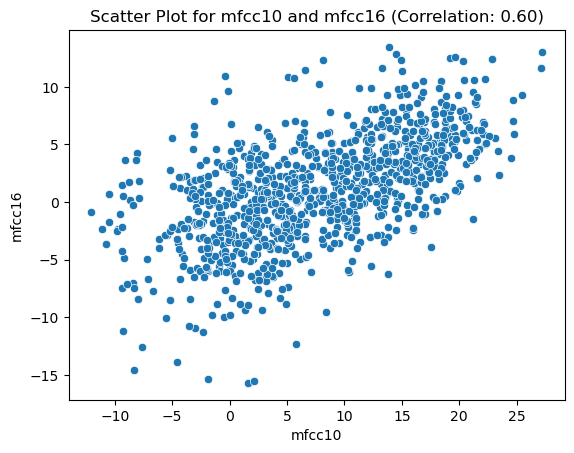

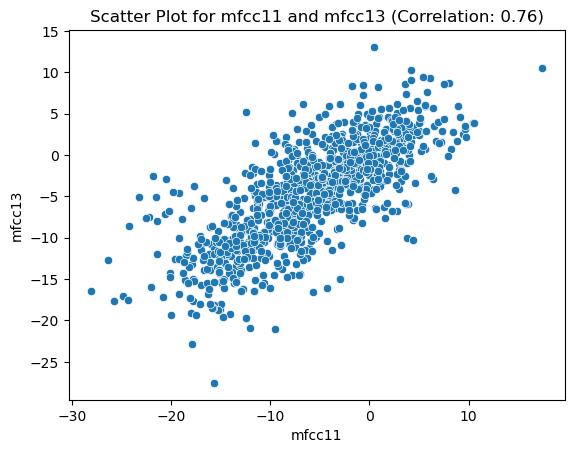

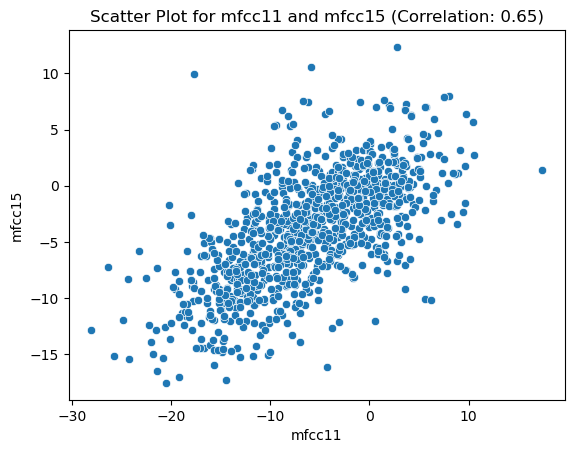

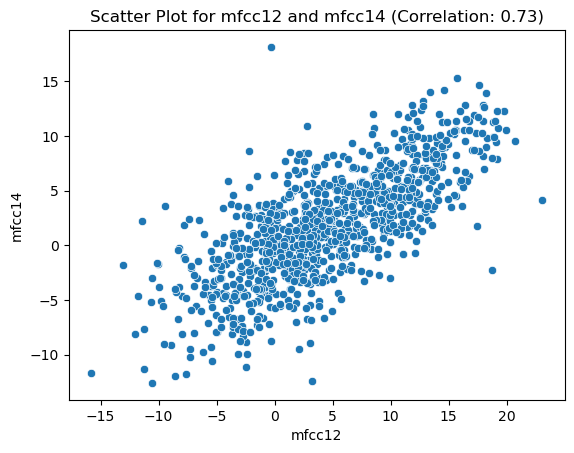

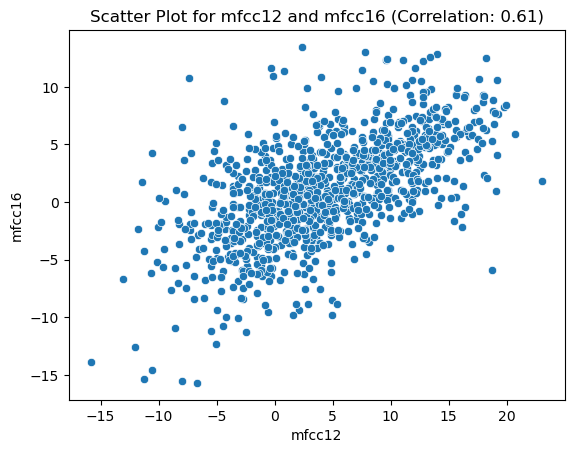

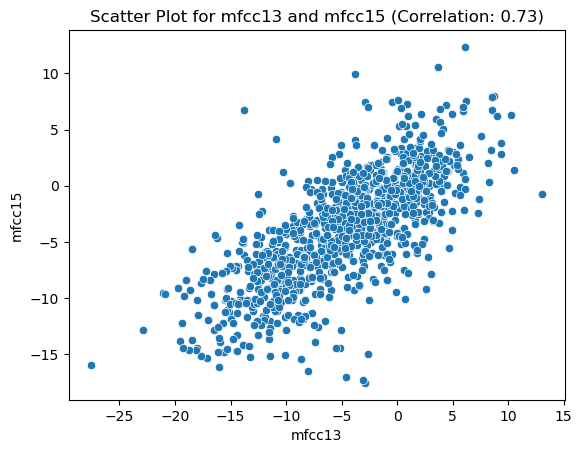

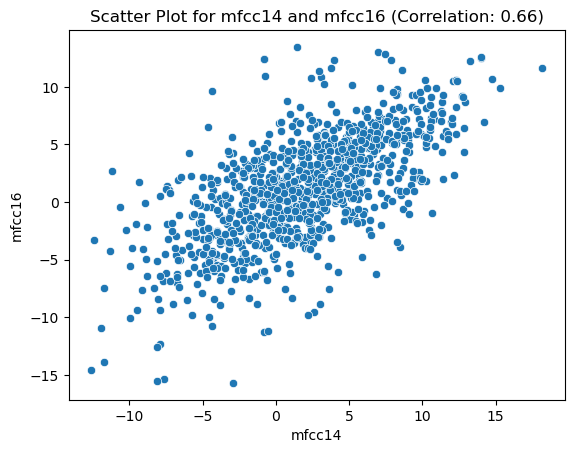

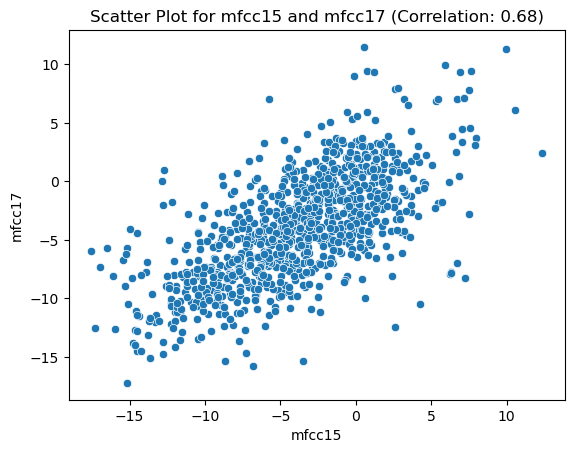

In [21]:
# Create scatterplots for all correlations greater than 0.6
# Set your correlation threshold (adjust as needed)
correlation_threshold = 0.6

for i in range(len(correlation_matrixData.columns)):
    for j in range(i + 1, len(correlation_matrixData.columns)):
        correlation_value = correlation_matrixData.iloc[i, j]
        if abs(correlation_value) > correlation_threshold:
            sns.scatterplot(x=correlation_matrixData.columns[i], y=correlation_matrixData.columns[j], data=dfData)
            plt.title(f"Scatter Plot for {correlation_matrixData.columns[i]} and {correlation_matrixData.columns[j]} (Correlation: {correlation_value:.2f})")
            plt.show()

## Multiple Regression

In [22]:
#Now we will create the multiple regression to model the association between linear variables and to further understand the potantial of IVs to predict a DV

# Separate the data
X = dfData[['spectral_centroid', 'spectral_bandwidth', 'zero_crossing_rate']]
y = dfData['rolloff']  

# Add constant term
X = sm.add_constant(X)

# Fit and show the multiple regression model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                rolloff   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 2.704e+04
Date:                Mon, 04 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:31:54   Log-Likelihood:                -6574.2
No. Observations:                1000   AIC:                         1.316e+04
Df Residuals:                     996   BIC:                         1.318e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -800.5701     38

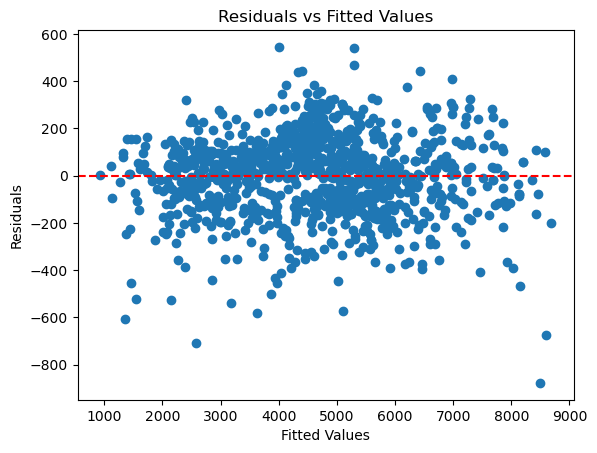

In [23]:
# Residuals vs Fitted Values Plot
residuals = model.resid
fitted_values = model.fittedvalues

plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

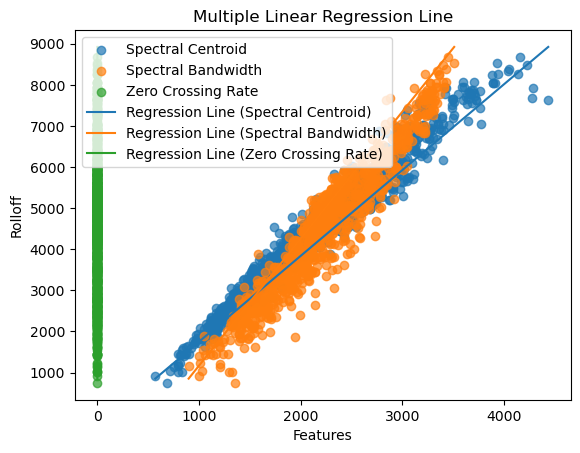

In [24]:
# Plot the regression line
# Extract coefficients from the model
intercept, coef_spectral_centroid, coef_spectral_bandwidth, coef_zero_crossing_rate = model.params

# Generate data for plotting the regression line
x_spectral_centroid = np.linspace(dfData['spectral_centroid'].min(), dfData['spectral_centroid'].max(), 100)
x_spectral_bandwidth = np.linspace(dfData['spectral_bandwidth'].min(), dfData['spectral_bandwidth'].max(), 100)
x_zero_crossing_rate = np.linspace(dfData['zero_crossing_rate'].min(), dfData['zero_crossing_rate'].max(), 100)

# Calculate predicted values using the regression equation
y_pred = intercept + coef_spectral_centroid * x_spectral_centroid + coef_spectral_bandwidth * x_spectral_bandwidth + coef_zero_crossing_rate * x_zero_crossing_rate

# Plot the scatter plot of the data
plt.scatter(dfData['spectral_centroid'], y, label='Spectral Centroid', alpha=0.7)
plt.scatter(dfData['spectral_bandwidth'], y, label='Spectral Bandwidth', alpha=0.7)
plt.scatter(dfData['zero_crossing_rate'], y, label='Zero Crossing Rate', alpha=0.7)

# Plot the regression line
plt.plot(x_spectral_centroid, y_pred, label='Regression Line (Spectral Centroid)')
plt.plot(x_spectral_bandwidth, y_pred, label='Regression Line (Spectral Bandwidth)')
plt.plot(x_zero_crossing_rate, y_pred, label='Regression Line (Zero Crossing Rate)')

plt.title('Multiple Linear Regression Line')
plt.xlabel('Features')
plt.ylabel('Rolloff')
plt.legend()
plt.show()

**Conclusion for Associations (Multiple regression)**

We can definitely conclude that the continuous varaibles in this data set are very highly correlated. We are facing multicollinearity and an R2 of almost 1. This means our data is too closely correlated and this can generate issues as we try to create predictions.

From our residual plt we can also conclude that the values are randomly scattered around the horizontal axis with no clear pattern. This is a clear indication that the relationship between the independent and dependent variables is likely linear and independent which means that the linear regression model is appropriate.

## Loss function (Categorical Cross- Entropy with SGD)

Since we are predicting a categorical dependent variable ('label', which represents the music genre), given a series of continuous numerical variables, we will use a loss function designed for classification problems. The Categorical Cross-Entropy Loss is a suitable approach since it is for multi-class classification problems, where the target variable is categorical and has more than two classes. 

In [25]:
#DATA LOSS FUNCTION

# Features (independent variables)
X = dfData[['tempo', 'beats', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth',
            'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5',
            'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13',
            'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20']]

# Target variable (categorical)
y = dfData['label']

# Encode the categorical variable 'label' using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert the encoded labels to one-hot encoding
y_one_hot = to_categorical(y_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Number of classes in the categorical variable 'label'
num_classes = len(np.unique(y_encoded))

# Build the neural network model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],)),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')  # Softmax for multi-class classification
])

# Compile the model with SGD optimizer with momentum
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss=CategoricalCrossentropy(), metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Run the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

Epoch 1/10
25/25 [==============================] - 0s 6ms/step - loss: 622512492773376.0000 - accuracy: 0.0925 - val_loss: 2.3225 - val_accuracy: 0.0650
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 2.3131 - accuracy: 0.1088 - val_loss: 2.3269 - val_accuracy: 0.0650
Epoch 3/10
25/25 [==============================] - 0s 2ms/step - loss: 2.3106 - accuracy: 0.1088 - val_loss: 2.3245 - val_accuracy: 0.0650
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 2.3075 - accuracy: 0.1088 - val_loss: 2.3222 - val_accuracy: 0.0650
Epoch 5/10
25/25 [==============================] - 0s 2ms/step - loss: 2.3049 - accuracy: 0.1088 - val_loss: 2.3203 - val_accuracy: 0.0650
Epoch 6/10
25/25 [==============================] - 0s 2ms/step - loss: 2.3039 - accuracy: 0.1088 - val_loss: 2.3204 - val_accuracy: 0.0650
Epoch 7/10
25/25 [==============================] - 0s 2ms/step - loss: 2.3031 - accuracy: 0.1088 - val_loss: 2.3194 - val_accuracy: 0.0650
Epoch 

## Evaluation of Loss function (confusion matrix, precision, recall, F1 score)

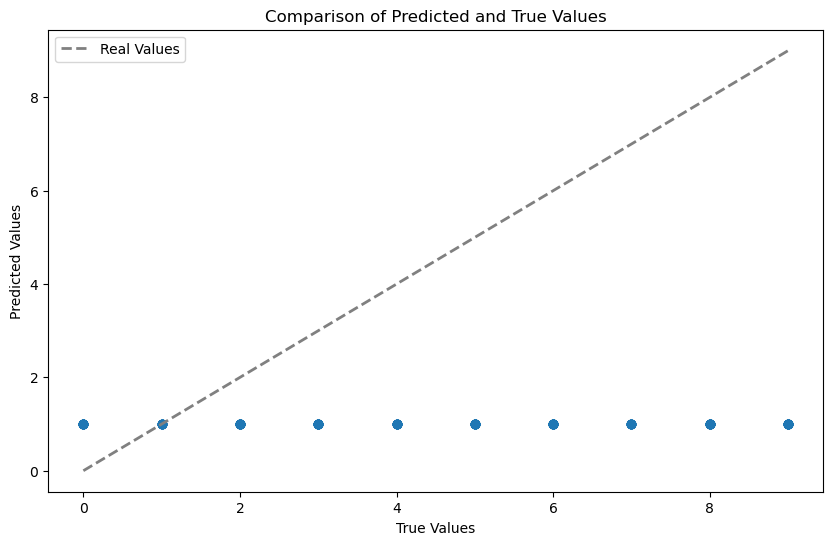

In [30]:
# Get the true class labels from one-hot encoding
y_true_classes = np.argmax(y_test, axis=1)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_true_classes, y_pred_classes, alpha=0.7)

# Plot the diagonal line (real values)
plt.plot([min(y_true_classes), max(y_true_classes)], [min(y_true_classes), max(y_true_classes)], linestyle='--', color='gray', linewidth=2, label='Real Values')

plt.title('Comparison of Predicted and True Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

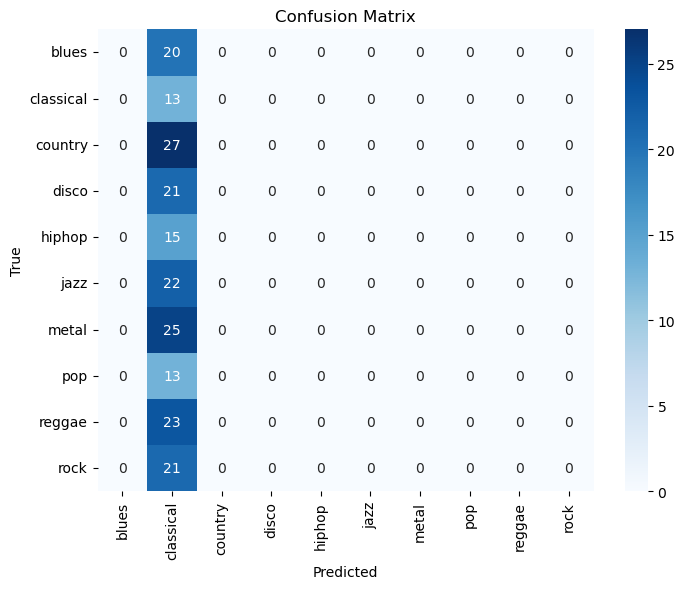

In [33]:
# Get the true class labels from one-hot encoding
y_true_classes = np.argmax(y_test, axis=1)

# Create the confusion matrix
conf_mat = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [36]:
# Print classification report
print(classification_report(y_true_classes, y_pred_classes, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00        20
           1       0.07      1.00      0.12        13
           2       1.00      0.00      0.00        27
           3       1.00      0.00      0.00        21
           4       1.00      0.00      0.00        15
           5       1.00      0.00      0.00        22
           6       1.00      0.00      0.00        25
           7       1.00      0.00      0.00        13
           8       1.00      0.00      0.00        23
           9       1.00      0.00      0.00        21

    accuracy                           0.07       200
   macro avg       0.91      0.10      0.01       200
weighted avg       0.94      0.07      0.01       200



**Conclusion for Evaluation of Loss function:**

- Precision: Of all the instances predicted as positive, 91% are actually positive. Indicates that when the model predicts positive, it is likely to be correct 91% of the time.
- Recall: Of all the actual positive instances, the model correctly predicted 10%. Indicates that the model is capturing about 10% of the positives.
- f1-score: balance bertween Recall and precision is evident which is we this is so los (1%)

## Simulating a scenario of over fitting for a classification problem

In [37]:
#To create a scenario prone to overfitting we can redice the number of samples and try to train a model and make predictions based on this reduced set of samples.

Accuracy on Training Set (Overfitting): 1.0
Accuracy on Test Set (Overfitting): 0.31


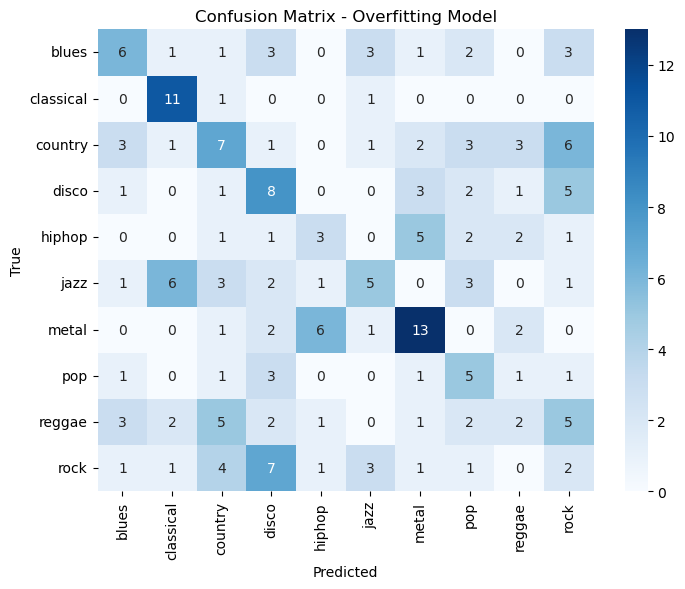

In [38]:
# Select a subset of features
X_subset = X[['tempo', 'beats', 'chroma_stft', 'rmse']]

# Use a small training dataset to encourage overfitting
X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)

# Train an overfitting model (Decision Tree)
model_overfit = DecisionTreeClassifier(max_depth=None)
model_overfit.fit(X_train, y_train)

# Define Predictions
y_train_pred_overfit = model_overfit.predict(X_train)
y_test_pred_overfit = model_overfit.predict(X_test)

# Evaluate the overfitting model
accuracy_train_overfit = accuracy_score(y_train, y_train_pred_overfit)
accuracy_test_overfit = accuracy_score(y_test, y_test_pred_overfit)

print(f'Accuracy on Training Set (Overfitting): {accuracy_train_overfit}')
print(f'Accuracy on Test Set (Overfitting): {accuracy_test_overfit}')

# Plot confusion matrix for the overfitting model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_test_pred_overfit), annot=True, fmt='d', cmap='Blues', xticklabels=model_overfit.classes_, yticklabels=model_overfit.classes_)
plt.title('Confusion Matrix - Overfitting Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [39]:
# Print classification report
print(classification_report(y_test, y_test_pred_overfit, zero_division=1))

              precision    recall  f1-score   support

       blues       0.38      0.30      0.33        20
   classical       0.50      0.85      0.63        13
     country       0.28      0.26      0.27        27
       disco       0.28      0.38      0.32        21
      hiphop       0.25      0.20      0.22        15
        jazz       0.36      0.23      0.28        22
       metal       0.48      0.52      0.50        25
         pop       0.25      0.38      0.30        13
      reggae       0.18      0.09      0.12        23
        rock       0.08      0.10      0.09        21

    accuracy                           0.31       200
   macro avg       0.30      0.33      0.31       200
weighted avg       0.30      0.31      0.30       200



**Conclusions on the simulated over-fitting scenario:**

Since our accuracy is much greater in our training set than on our test set, we can conclude that there may be overfitting in our model due to the reduced set of samples or noise that has been captured by the model. 

Here are some other signs of overfitting in our model:

1) Precision is low: On average, about one-third of the instances predicted as positive are true positives.
2) Recall is also low: On average, about one-third of the actual positive instances are correctly identified by the model.
3) Our F1-score indicates that there is a trade-off between precision and recall (the model is making an approximately equal number of true positive predictions relative to false positive and false negative predictions.)

## Regularization for scenario of overfitting

Accuracy on Training Set (L1 Regularization): 0.38
Accuracy on Test Set (L1 Regularization): 0.28


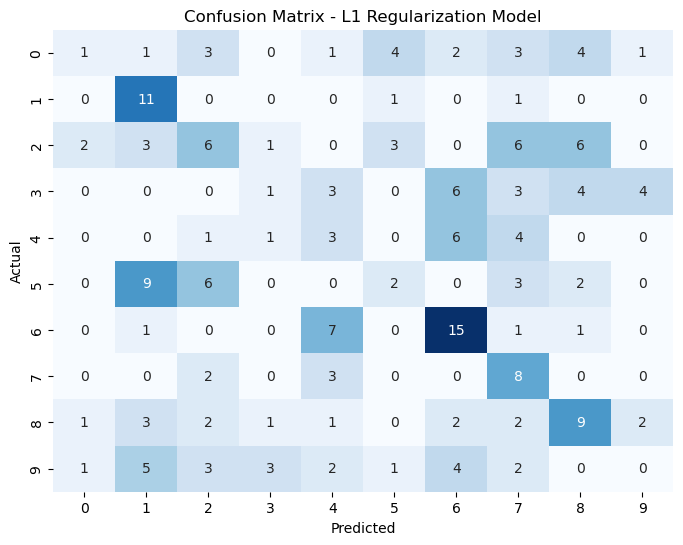

              precision    recall  f1-score   support

       blues       0.20      0.05      0.08        20
   classical       0.33      0.85      0.48        13
     country       0.26      0.22      0.24        27
       disco       0.14      0.05      0.07        21
      hiphop       0.15      0.20      0.17        15
        jazz       0.18      0.09      0.12        22
       metal       0.43      0.60      0.50        25
         pop       0.24      0.62      0.35        13
      reggae       0.35      0.39      0.37        23
        rock       0.00      0.00      1.00        21

    accuracy                           0.28       200
   macro avg       0.23      0.31      0.34       200
weighted avg       0.23      0.28      0.34       200

Accuracy on Training Set (L2 Regularization): 0.33625
Accuracy on Test Set (L2 Regularization): 0.245


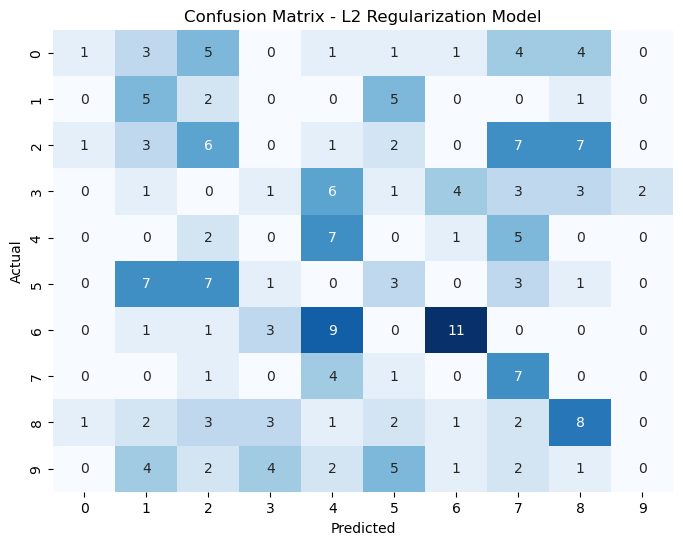

              precision    recall  f1-score   support

       blues       0.33      0.05      0.09        20
   classical       0.19      0.38      0.26        13
     country       0.21      0.22      0.21        27
       disco       0.08      0.05      0.06        21
      hiphop       0.23      0.47      0.30        15
        jazz       0.15      0.14      0.14        22
       metal       0.58      0.44      0.50        25
         pop       0.21      0.54      0.30        13
      reggae       0.32      0.35      0.33        23
        rock       0.00      0.00      1.00        21

    accuracy                           0.24       200
   macro avg       0.23      0.26      0.32       200
weighted avg       0.24      0.24      0.32       200



In [40]:
#Now we will try two regularization teqniques (L1 and L2) on our overfitted model

# Apply Logistic Regression with L1 regularization
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42)
model_l1.fit(X_train, y_train)

# Predictions on training and test sets
y_train_pred_l1 = model_l1.predict(X_train)
y_test_pred_l1 = model_l1.predict(X_test)

# Evaluate L1 regularization model
accuracy_train_l1 = accuracy_score(y_train, y_train_pred_l1)
accuracy_test_l1 = accuracy_score(y_test, y_test_pred_l1)

print(f'Accuracy on Training Set (L1 Regularization): {accuracy_train_l1}')
print(f'Accuracy on Test Set (L1 Regularization): {accuracy_test_l1}')

# Confusion matrix for L1 regularization model
conf_matrix_l1 = confusion_matrix(y_test, y_test_pred_l1)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_l1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - L1 Regularization Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report for L1 regulatization model
print(classification_report(y_test, y_test_pred_l1, zero_division=1))

# Apply Logistic Regression with L2 regularization
model_l2 = LogisticRegression(penalty='l2', max_iter=1000, random_state=42)
model_l2.fit(X_train, y_train)

# Predictions on training and test sets
y_train_pred_l2 = model_l2.predict(X_train)
y_test_pred_l2 = model_l2.predict(X_test)

# Evaluate L2 regularization model
accuracy_train_l2 = accuracy_score(y_train, y_train_pred_l2)
accuracy_test_l2 = accuracy_score(y_test, y_test_pred_l2)

print(f'Accuracy on Training Set (L2 Regularization): {accuracy_train_l2}')
print(f'Accuracy on Test Set (L2 Regularization): {accuracy_test_l2}')

# Confusion matrix for L2 regularization model
conf_matrix_l2 = confusion_matrix(y_test, y_test_pred_l2)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_l2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - L2 Regularization Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report for L2 regulatization model
print(classification_report(y_test, y_test_pred_l2, zero_division=1))

**Conclusion on regularization for overfitted scenario**
We are seeing that our precision, recall and f1-score have decreased even further after regularization. in the case of L1, we also see that accuracy on the training set continues to be greater than accurcay on the test set. This means oru rgularization has not really helped in making the model generalize well. We would need to investigate further to be able to fix this simulated scenario.

## Kernel transformation to linear space, model fit and accuracy assessment 

In [76]:
# Define target and features
X = dfData.drop(['label','filename'], axis=1)
y = dfData['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We will ise SVM with a radial basis function (RBF) kernel
svm_model = SVC(kernel='rbf', C=1)

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test)

# Assess accuracy and other metrics
print(classification_report(y_test, y_pred, zero_division=1))


              precision    recall  f1-score   support

       blues       0.04      0.05      0.04        20
   classical       0.24      0.85      0.38        13
     country       1.00      0.00      0.00        27
       disco       1.00      0.00      0.00        21
      hiphop       0.11      0.27      0.15        15
        jazz       1.00      0.00      0.00        22
       metal       0.38      0.64      0.48        25
         pop       0.44      0.85      0.58        13
      reggae       1.00      0.00      0.00        23
        rock       0.23      0.29      0.26        21

    accuracy                           0.24       200
   macro avg       0.54      0.29      0.19       200
weighted avg       0.59      0.24      0.16       200



**Conclusion on Kernel transformation**:

Accuracy: approximately 24.5% of our music test dataset was classified correctly by the Support Vector Machine (SVM) model

Precision: about 59% of the instances predicted as positive by the model were actually positive

Recall: captured only 24% of the actual positive instances (the model is not great at capturing ALL positive instances)

F1-score: indicates there is an imbalance between precision and recall (likely due to the precision being much higher than the recall)

# 3.2 HOUSING - ANALYSIS

We have mostly categorical variables that can most likely be used to predict the continuous numerical variable "price". However, we also have continuous and discrete numerical variables. We started out by analyzing the relationship between continuous variables through a correlation matrix and a heat map. This allowed us to detect that there are no continous variables showing linearity.

Then, we moved on to create a K-Nearest Neighbour (KNN) predictive model. This is an appropriate predictive technique because it is non-parametric, meaning that we do not need to test if the parametric assumptions are met. Because all input data used in a KNN must be numerical, we will encode categorical input variables with the pd.get_dummies function.

We will assume that the data is balanced since imbalanced data may result in incorrect predictions as the most common label dominates the feature space.

For our Loss functions we have picked Mean Squared Error (MSE) (L2 Loss - defined as the average of the squared differences between predicted and actual values) because this is ultimately a regression problem in which we are trying to predict a continuous numeric variable (price). We will also conduct a Huber loss function and compare these to select the most appropriate for our model by looking at:

1) Accuracy: This metric is suitable for multiclass classification problems. It measures the overall correctness of the model's predictions.

2) Precision, Recall, and F1-Score: These metrics provide a more detailed analysis of the model's performance for each class. They are particularly useful when dealing with imbalanced datasets or when different classes have different levels of importance.

3) Confusion Matrix: The confusion matrix breaks down the model's predictions into true positives, true negatives, false positives, and false negatives for each class. It gives a clear picture of the model's performance on individual classes.

## Correlation matrix and heatmap

              price      area  bedrooms  bathrooms   stories   parking
price      1.000000  0.535997  0.366494   0.517545  0.420712  0.384394
area       0.535997  1.000000  0.151858   0.193820  0.083996  0.352980
bedrooms   0.366494  0.151858  1.000000   0.373930  0.408564  0.139270
bathrooms  0.517545  0.193820  0.373930   1.000000  0.326165  0.177496
stories    0.420712  0.083996  0.408564   0.326165  1.000000  0.045547
parking    0.384394  0.352980  0.139270   0.177496  0.045547  1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

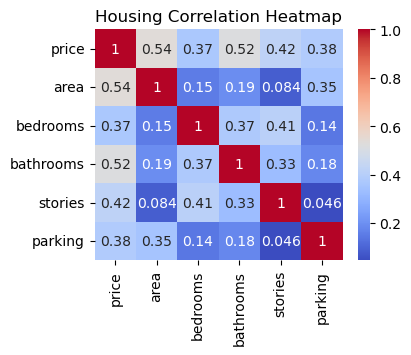

In [42]:
# Columns to ignore in correlation matrix
dataHousing = ['mainroad','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus','guestroom','filename']

dfHousing['mainroad']=dfHousing['mainroad'].astype('category')
dfHousing['basement']=dfHousing['basement'].astype('category')
dfHousing['hotwaterheating']=dfHousing['basement'].astype('category')          
dfHousing['airconditioning']=dfHousing['basement'].astype('category')
dfHousing['prefarea']=dfHousing['basement'].astype('category')
dfHousing['furnishingstatus']=dfHousing['basement'].astype('category')
dfHousing['guestroom']=dfHousing['guestroom'].astype('category')

# Exclude columns to ignore from the correlation matrix
columns_for_correlation = [col for col in dfHousing.columns if col not in dataHousing]
correlation_matrixHousing = dfHousing[columns_for_correlation].corr()
print(correlation_matrixHousing)
plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrixHousing, xticklabels=correlation_matrixHousing.columns, yticklabels=correlation_matrixHousing.columns, cmap='coolwarm', annot=True)
plt.title("Housing Correlation Heatmap")
plt.show

In [43]:
#There are no correlations above a 0.5 and there is a strange pattern that leads us to believe that this data is NOT linear

## KNN predictive algorithm

KNN is a non-parametric algorithm, meaning it doesn't make assumptions about the underlying distribution of the data.

In [44]:
#To use a KNN model we mus create a label encoder
label_encoder = LabelEncoder()

In [45]:
#Set target variables and features
columns_to_drop = ['price','area','bedrooms','bathrooms','stories','parking']
X = dfHousing.drop(columns=columns_to_drop)
y = dfHousing['price'] 

In [46]:
#Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode categorical variables
X_train_encoded = pd.get_dummies(X_train, columns=['mainroad','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus','guestroom'])

In [47]:
#Create and train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_encoded, y_train)

KNeighborsClassifier()

In [48]:
# Define our feaures
feature_names = ['mainroad','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus','guestroom']
# Create a DataFrame with the same structure as X_train but with random values
num_samples = 100 
X_new = pd.DataFrame(index=range(num_samples), columns=feature_names)

# Fill categorical columns with random categorical values
for column in feature_names:
    categories = X_train[column].unique()
    X_new[column] = np.random.choice(categories, size=num_samples)

# Fill numeric columns with random numeric values
for column in X_new.select_dtypes(include=['int64', 'float64']).columns:
    mean_value = X_train[column].mean()
    std_value = X_train[column].std()
    X_new[column] = np.random.normal(mean_value, std_value, num_samples)

X_new.head()

mainroad basement hotwaterheating airconditioning prefarea furnishingstatus  \
0      yes       no              no              no       no               no   
1       no      yes              no             yes      yes              yes   
2       no       no              no              no       no              yes   
3       no       no             yes              no       no               no   
4      yes      yes              no              no      yes              yes   

  guestroom  
0       yes  
1       yes  
2        no  
3       yes  
4       yes

In [49]:
# Encode the replica we created, our categorical features must be in the same order as in X_train
X_new_encoded = pd.get_dummies(X_new, columns=['mainroad','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus','guestroom'])

# Convert to NumPy array
X_new_array = X_new_encoded.values

# Make predictions
y_pred_new = knn_classifier.predict(X_new_array)
print(y_pred_new)

[4235000 3150000 1767150 3010000 3920000 4200000 3010000 3010000 3430000
 3150000 3920000 3640000 2275000 2275000 1767150 3150000 3640000 3010000
 1767150 3010000 3010000 3920000 4200000 3920000 3010000 2275000 4200000
 2275000 4235000 3150000 1767150 1767150 4200000 2275000 3640000 1767150
 4200000 4200000 3150000 3920000 4235000 3920000 4235000 4235000 1767150
 3640000 4235000 3430000 3640000 3920000 4200000 1767150 3920000 3920000
 3640000 3010000 3150000 1767150 2275000 1767150 2275000 3150000 4200000
 3010000 4235000 4200000 3150000 1767150 2275000 1767150 3920000 3640000
 4235000 4235000 3920000 3920000 3010000 3920000 4200000 2275000 3150000
 3640000 3010000 3640000 4200000 3010000 1767150 4200000 1767150 3150000
 3920000 3640000 4235000 4200000 4200000 3920000 4200000 4235000 4235000
 3150000]


/Users/mclevesluna/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [50]:
#We will ignore the following warning as our feature names do match and it is not an error
#Know that we do have our KNN model ready, we will test out its accuracy
# Accuracy Score
accuracy_train = accuracy_score(y_train, knn_classifier.predict(X_train_encoded))
print (accuracy_train)

0.02981651376146789


## Loss functions (L2 and SMV) and plots

In [51]:
#HOUSING LOSS FUNCTION WITH HINGE LOSS (SMV)

# Separate features and target
X = dfHousing[['area', 'bedrooms', 'bathrooms', 'parking', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']]
y = dfHousing['price']

# Encode categorical variables (one-hot encoding)
X_encoded = pd.get_dummies(X, columns=['area', 'bedrooms', 'bathrooms', 'parking', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the Huber regression model
huber_model = HuberRegressor(epsilon=1.35)  # epsilon is a parameter that influences the number of outliers
huber_model.fit(X_train, y_train)

# Make predictions on the test set
y_predHuber = huber_model.predict(X_test)

# Evaluate the model using Huber loss
huber_loss = mean_squared_error(y_test, y_predHuber)
print(f'Huber Loss: {huber_loss}')

# Calculate R-squared for Huber Loss
r2_huberHousing = r2_score(y_test, y_predHuber)
print(f'R2: {r2_huberHousing}')

Huber Loss: 3633364696425.007
R2: 0.2811723807693184


In [52]:
#HOUSING LOSS FUNCTION WITH L2 (MSE)

#seperate feaures and target
X = dfHousing[['area','bedrooms','bathrooms','parking','mainroad', 'guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']]
y = dfHousing['price']

# Encode categorical variables (one-hot encoding)
X_encoded = pd.get_dummies(X, columns=['area','bedrooms','bathrooms','parking','mainroad', 'guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared for Mean Squared Error
r2_mseHousing = r2_score(y_test, y_pred)
print(f'R2: {r2_mseHousing}')


Mean Squared Error: 3.200990185079698e+35
R2: -6.332863189279106e+22


## Evaluation of Loss functions (precision, recall, F1 score)

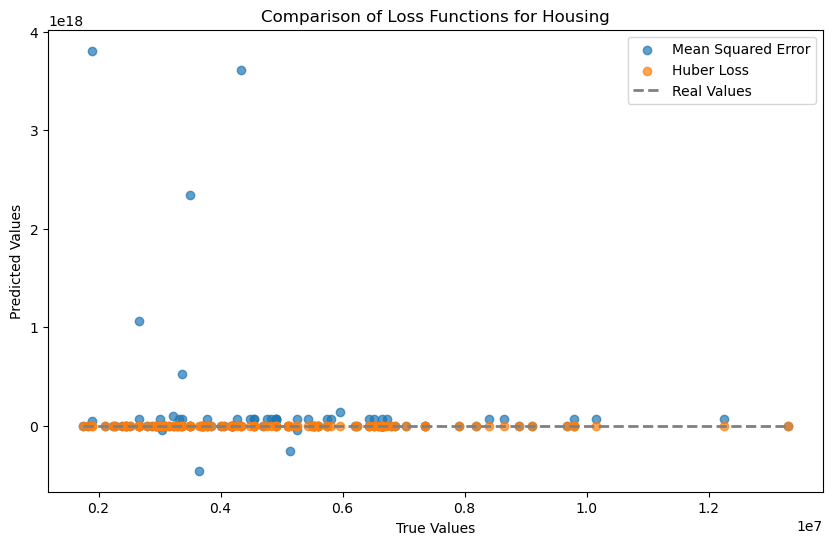

In [53]:
# Plotting

# Create a scatter plot for Mean Squared Error
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='Mean Squared Error', alpha=0.7)

# Create a scatter plot for Huber loss
plt.scatter(y_test, y_predHuber, label='Huber Loss', alpha=0.7)

# Plot the diagonal line (real values)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', linewidth=2, label='Real Values')

plt.title('Comparison of Loss Functions for Housing')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [54]:
# Print classification report to look at precision, recall and f1-score for the MSE Loss function
#Making my y_pred a whole number of the same type as y_test
y_test = y_test.astype(int)
y_pred = np.round(y_pred).astype(int)

print(classification_report(y_test, y_pred, zero_division=1))

                     precision    recall  f1-score   support

-457570718266451968       0.00      1.00      0.00       0.0
-257588900865469440       0.00      1.00      0.00       0.0
 -40921223937879040       0.00      1.00      0.00       0.0
 -40921223936316416       0.00      1.00      0.00       0.0
            1750000       1.00      0.00      0.00       1.0
            1820000       1.00      0.00      0.00       1.0
            1890000       1.00      0.00      0.00       2.0
            2100000       1.00      0.00      0.00       1.0
            2233000       1.00      0.00      0.00       1.0
            2275000       1.00      0.00      0.00       1.0
            2380000       1.00      0.00      0.00       1.0
            2390528       0.00      1.00      0.00       0.0
            2450000       1.00      0.00      0.00       2.0
            2520000       1.00      0.00      0.00       1.0
            2543616       0.00      1.00      0.00       0.0
            2660000    

**Conclusions for evaluation of Loss functions in Housing Dataset**

We can conclude that both of our Loss functions have similar precision, recall and F1 scores. However our MSE Loss function is slightly a better fit, arriving at the correct results approximately 2/3 of the time.

More specifically, our MSE function:

Precision: Of all the instances predicted as positive, 53% are actually positive. Indicates that when the model predicts positive, it is likely to be correct 53% of the time.

Recall: Of all the actual positive instances, the model correctly predicted 57%. Indicates that the model is capturing about half of the positives.

f1-score: balance bertween Recall and precision is also around half.

In [55]:
# Print classification report to look at precision, recall and f1-score for the Huber Loss function

#Making my y_predHuber a whole number of the same type as y_test
y_test = y_test.astype(int)
y_predHuber = np.round(y_predHuber).astype(int)

print(classification_report(y_test, y_predHuber, zero_division=1))

              precision    recall  f1-score   support

     1750000       1.00      0.00      0.00       1.0
     1820000       1.00      0.00      0.00       1.0
     1890000       1.00      0.00      0.00       2.0
     2100000       1.00      0.00      0.00       1.0
     2233000       1.00      0.00      0.00       1.0
     2275000       1.00      0.00      0.00       1.0
     2380000       1.00      0.00      0.00       1.0
     2450000       1.00      0.00      0.00       2.0
     2520000       1.00      0.00      0.00       1.0
     2660000       1.00      0.00      0.00       4.0
     2800000       1.00      0.00      0.00       1.0
     2870000       1.00      0.00      0.00       1.0
     2940000       1.00      0.00      0.00       2.0
     3003000       1.00      0.00      0.00       1.0
     3010000       1.00      0.00      0.00       1.0
     3045000       1.00      0.00      0.00       1.0
     3067762       0.00      1.00      0.00       0.0
     3080000       1.00    

# 3.3 WINE - ANALYSIS

Since all variables are continuous, except prolione which is discrete, we started out by correlation matrix and a heat map. This will allow us to detect linearity between variables with a high correlation. We can later confirm this by plotting scatter plots between those variables. (exploratory analysis technique)

We did identify linearity between some variables so to explore further and even to set up the base for a predictive model we conducted a multiple regression model. We also plotted the residuals against the fitted model (inferential analysis techniques).

For our Loss functions we have picked Mean Squared Error (MSE) (L2 Loss - defined as the average of the squared differences between predicted and actual values) because this is ultimately a regression problem in which we are trying to predict a continuous numeric variable (alcohol). We will also conduct a Huber loss function and compare these to select the most appropriate for our model by looking at:

Accuracy: This metric is suitable for multiclass classification problems. It measures the overall correctness of the model's predictions.

Precision, Recall, and F1-Score: These metrics provide a more detailed analysis of the model's performance for each class. They are particularly useful when dealing with imbalanced datasets or when different classes have different levels of importance.

Confusion Matrix: The confusion matrix breaks down the model's predictions into true positives, true negatives, false positives, and false negatives for each class. It gives a clear picture of the model's performance on individual classes.

## Correlation matrix and heatmap

                              Unnamed: 0   alcohol  malic_acid       ash  \
Unnamed: 0                      1.000000 -0.362844    0.487630 -0.016086   
alcohol                        -0.362844  1.000000    0.094397  0.211545   
malic_acid                      0.487630  0.094397    1.000000  0.164045   
ash                            -0.016086  0.211545    0.164045  1.000000   
alcalinity_of_ash               0.563955 -0.310235    0.288500  0.443367   
magnesium                      -0.232275  0.270798   -0.054575  0.286587   
total_phenols                  -0.650084  0.289101   -0.335167  0.128980   
flavanoids                     -0.758609  0.236815   -0.411007  0.115077   
nonflavanoid_phenols            0.482817 -0.155929    0.292977  0.186230   
proanthocyanins                -0.406681  0.136698   -0.220746  0.009652   
color_intensity                 0.255444  0.546364    0.248985  0.258887   
hue                            -0.662205 -0.071747   -0.561296 -0.074667   
od280/od315_

<function matplotlib.pyplot.show(close=None, block=None)>

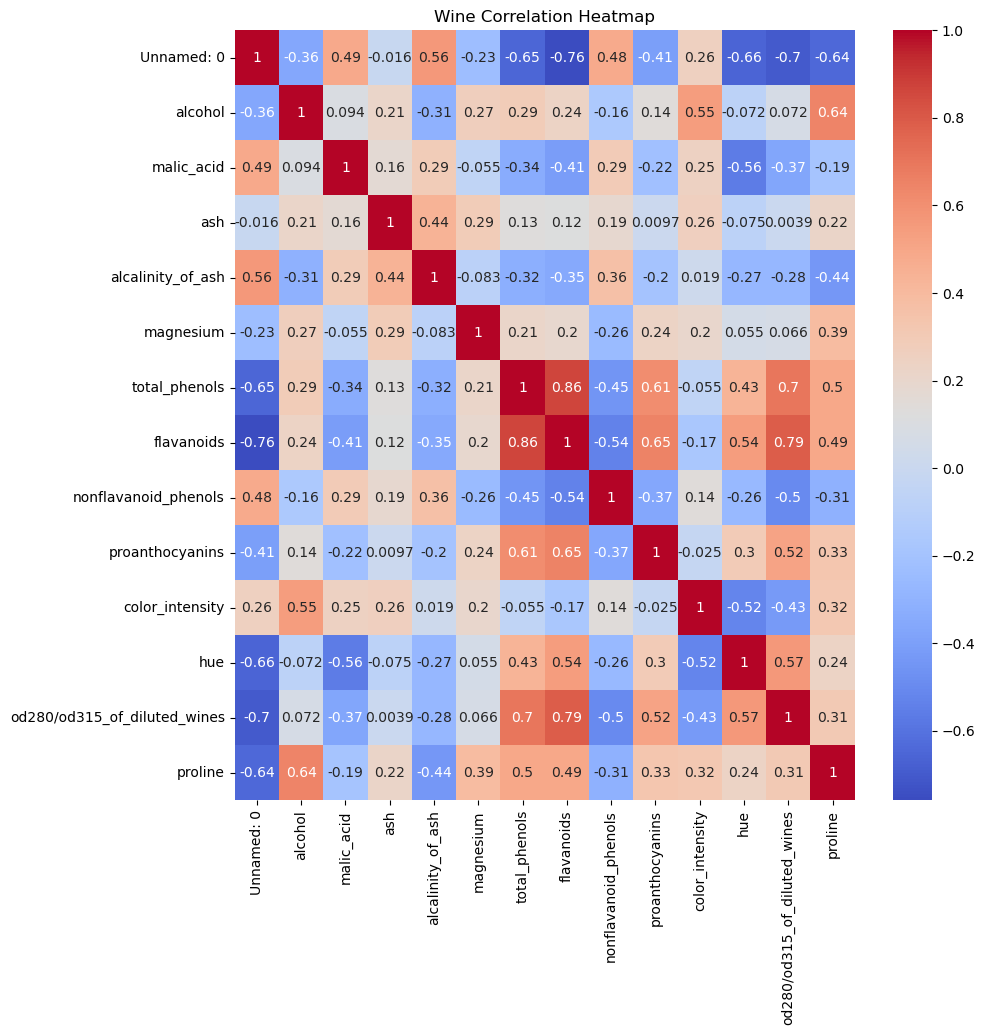

In [56]:
# Exclude columns to ignore from the correlation matrix
correlation_matrixWine = dfWine.corr()
print(correlation_matrixWine)
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrixWine, xticklabels=correlation_matrixWine.columns, yticklabels=correlation_matrixWine.columns, cmap='coolwarm', annot=True)
plt.title("Wine Correlation Heatmap")
plt.show

## Open to view all scatterplots for correlations greater than 0.6

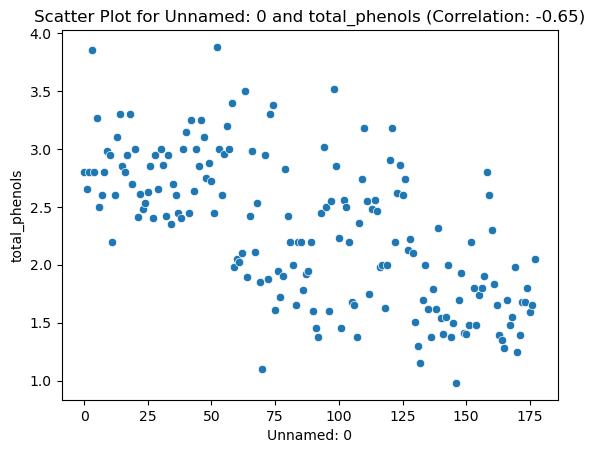

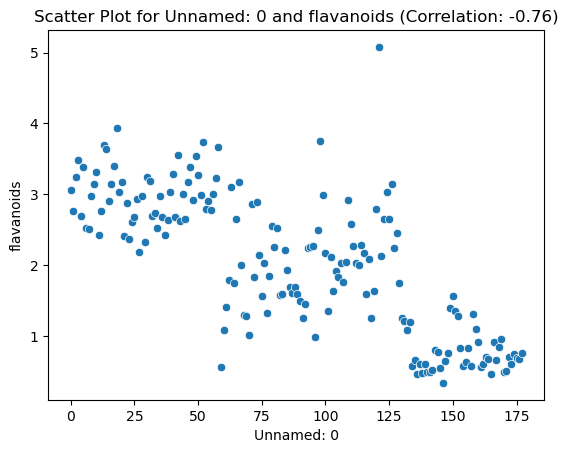

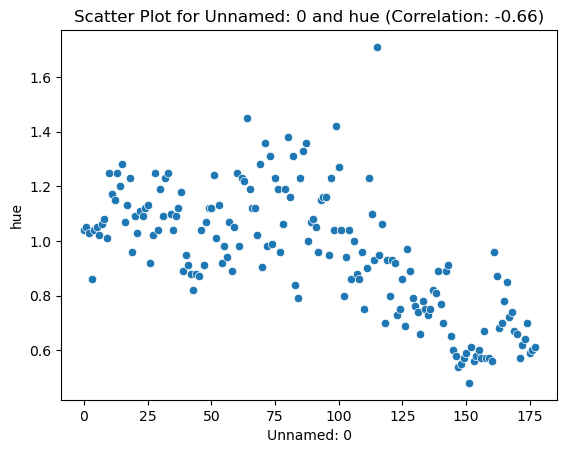

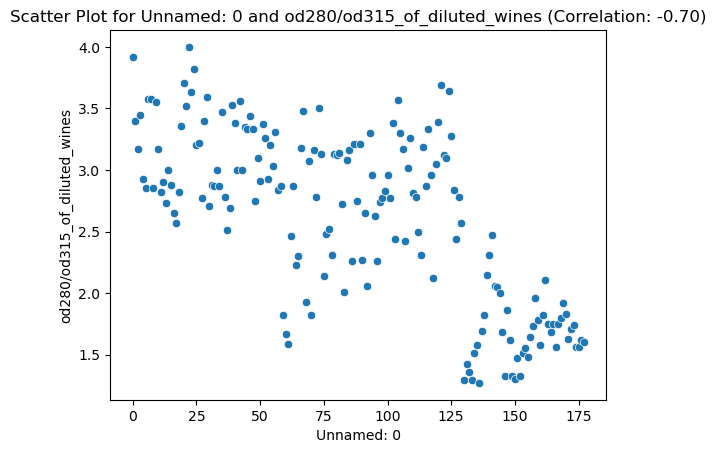

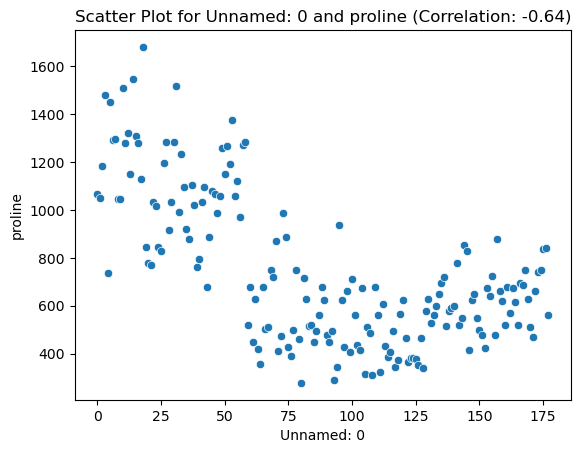

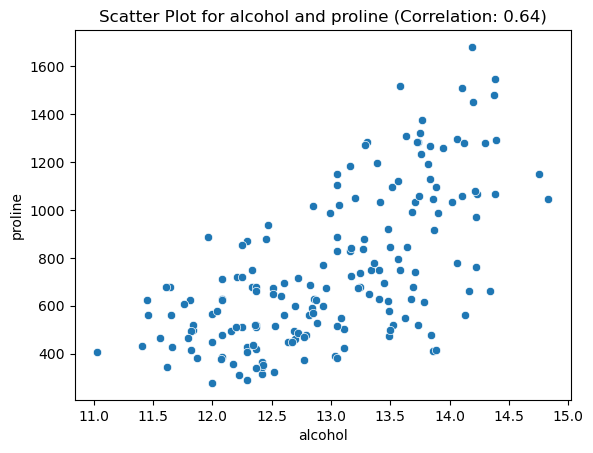

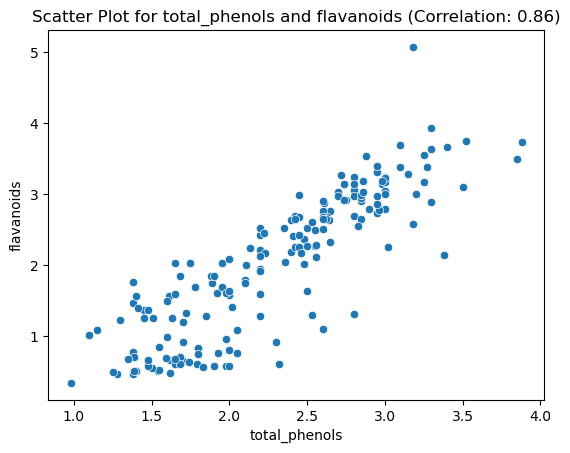

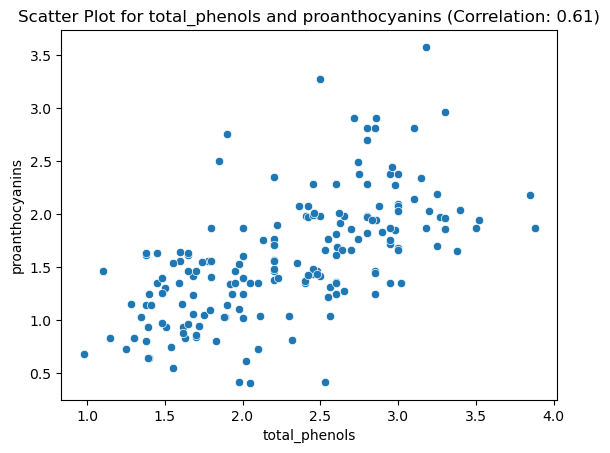

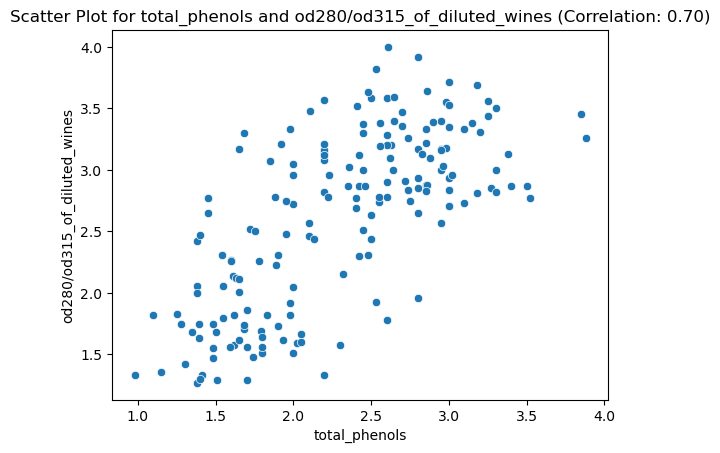

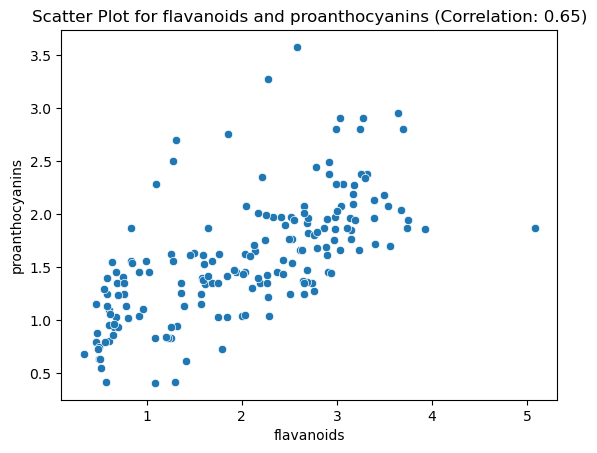

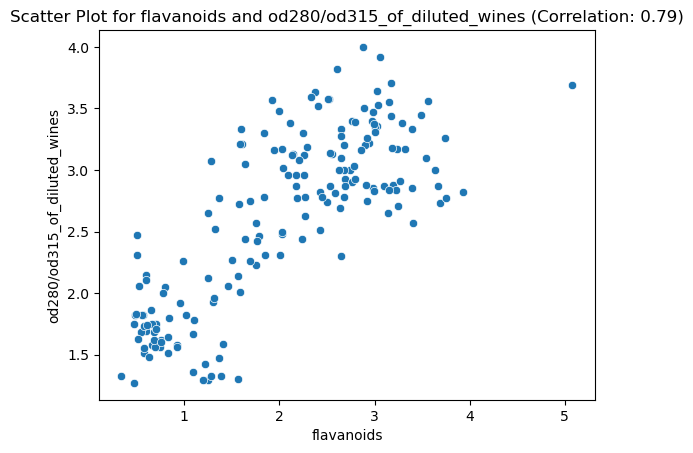

In [57]:
# Iterate over pairs of columns and make scatter plots for correlations above the threshold

# Set your correlation threshold (adjust as needed)
correlation_threshold = 0.6

for i in range(len(correlation_matrixWine.columns)):
    for j in range(i + 1, len(correlation_matrixWine.columns)):
        correlation_value = correlation_matrixWine.iloc[i, j]
        if abs(correlation_value) > correlation_threshold:
            sns.scatterplot(x=correlation_matrixWine.columns[i], y=correlation_matrixWine.columns[j], data=dfWine)
            plt.title(f"Scatter Plot for {correlation_matrixWine.columns[i]} and {correlation_matrixWine.columns[j]} (Correlation: {correlation_value:.2f})")
            plt.show()

## Multiple Regression

In [58]:
#Now we will create the multiple regression

# Separate the data
columns_to_keep = dfWine.columns.difference(columns_to_drop)
X = dfWine[columns_to_keep]
y = dfWine['alcohol']  

# Add constant term
X = sm.add_constant(X)

# Fit and show the multiple regression model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                alcohol   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.024e+28
Date:                Mon, 04 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:39:17   Log-Likelihood:                 5367.4
No. Observations:                 178   AIC:                        -1.070e+04
Df Residuals:                     163   BIC:                        -1.066e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

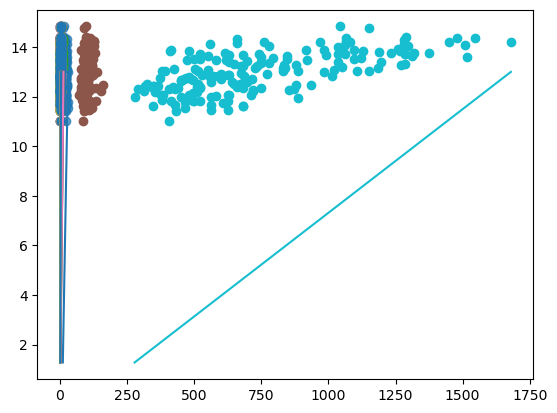

In [59]:
# Plot the regression line
# Extract coefficients from the model
coefficients = model.params

# Generate data for plotting the regression line
x_alcalinity = np.linspace(dfWine['alcalinity_of_ash'].min(), dfWine['alcalinity_of_ash'].max(), 100)
x_ash = np.linspace(dfWine['ash'].min(), dfWine['ash'].max(), 100)
x_color_intensity = np.linspace(dfWine['color_intensity'].min(), dfWine['color_intensity'].max(), 100)
x_flavanoids = np.linspace(dfWine['flavanoids'].min(), dfWine['flavanoids'].max(), 100)
x_hue = np.linspace(dfWine['hue'].min(), dfWine['hue'].max(), 100)
x_magnesium = np.linspace(dfWine['magnesium'].min(), dfWine['magnesium'].max(), 100)
x_malic_acid = np.linspace(dfWine['malic_acid'].min(), dfWine['malic_acid'].max(), 100)
x_nonflavanoid_phenols = np.linspace(dfWine['nonflavanoid_phenols'].min(), dfWine['nonflavanoid_phenols'].max(), 100)
x_od280 = np.linspace(dfWine['od280/od315_of_diluted_wines'].min(), dfWine['od280/od315_of_diluted_wines'].max(), 100)
x_proanthocyanins = np.linspace(dfWine['proanthocyanins'].min(), dfWine['proanthocyanins'].max(), 100)
x_proline = np.linspace(dfWine['proline'].min(), dfWine['proline'].max(), 100)
x_total_phenols = np.linspace(dfWine['total_phenols'].min(), dfWine['total_phenols'].max(), 100)

# Calculate predicted values using the regression equation
y_pred = np.zeros_like(x_alcalinity)
for i, x in enumerate([x_alcalinity, x_ash, x_color_intensity, x_flavanoids, x_hue, x_magnesium,
                        x_malic_acid, x_nonflavanoid_phenols, x_od280, x_proanthocyanins, x_proline, x_total_phenols]):
    y_pred += coefficients[i + 1] * x  # Note: coefficients[0] is the intercept

# Plot the scatter plot of the data (assuming 'y' is your dependent variable)
plt.scatter(dfWine['alcalinity_of_ash'], y, label='Alcalinity of Ash', alpha=0.7)
plt.scatter(dfWine['ash'], y, label='Ash', alpha=0.7)
plt.scatter(dfWine['color_intensity'], y, label='Color')
plt.scatter(dfWine['flavanoids'], y, label='flavanoids')
plt.scatter(dfWine['hue'], y, label='Hue')
plt.scatter(dfWine['magnesium'], y, label='Magnesium')
plt.scatter(dfWine['malic_acid'], y, label='Malic Acid')
plt.scatter(dfWine['nonflavanoid_phenols'], y, label='Nonflavanoid P.')
plt.scatter(dfWine['proanthocyanins'], y, label='Proanthocyanins')
plt.scatter(dfWine['proline'], y, label='Proline')
plt.scatter(dfWine['total_phenols'], y, label='Total phenols')

# Plot the regression line
plt.plot(x_alcalinity, y_pred, label='RegLine - Alcalinity of Ash')
plt.plot(x_ash, y_pred, label='RegLine - Ash')
plt.plot(x_color_intensity, y_pred, label='RegLine - Color')
plt.plot(x_flavanoids, y_pred, label='Reg-Line - Flavanoids')
plt.plot(x_hue, y_pred, label='RegLine - Hue')
plt.plot(x_color_intensity, y_pred, label='RegLine - Magnesium')
plt.plot(x_color_intensity, y_pred, label='RegLine - Malic Acid')
plt.plot(x_nonflavanoid_phenols, y_pred, label='RegLine - Nonflavanoid')
plt.plot(x_proanthocyanins, y_pred, label='RegLine - Proanthocyanins')
plt.plot(x_proline, y_pred, label='RegLine - Proline')
plt.plot(x_total_phenols, y_pred, label='RegLine - Total Phenols')

## Loss functions (L2 and SMV)

In [60]:
#WINE LOSS FUNCTION WITH L2 (MSE)

columns_to_drop = ['alcohol']
X = dfWine.drop(columns=columns_to_drop)
y = dfWine['alcohol']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared for Mean Squared Error
r2_mseWine = r2_score(y_test, y_pred)
print(f'R2: {r2_mseWine}')

Mean Squared Error: 0.17836508174415613
R2: 0.7012489351450966


In [61]:
#WINE LOSS FUNCTION WITH HINGE LOSS (SMV)

columns_to_drop = ['alcohol']
X = dfWine.drop(columns=columns_to_drop)
y = dfWine['alcohol']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Huber regression model
huber_model = HuberRegressor(epsilon=1.35,max_iter=4000)  # epsilon is a parameter that influences the number of outliers
huber_model.fit(X_train, y_train)

# Make predictions on the test set
y_predHuber = huber_model.predict(X_test)

# Evaluate the model using Huber loss
huber_loss = mean_squared_error(y_test, y_predHuber)
print(f'Huber Loss: {huber_loss}')

# Calculate R-squared for Huber Loss
r2_huberWine = r2_score(y_test, y_predHuber)
print(f'R2: {r2_huberWine}')

Huber Loss: 0.17076582445490382
R2: 0.7139772460065632


## Evaluating Loss functions

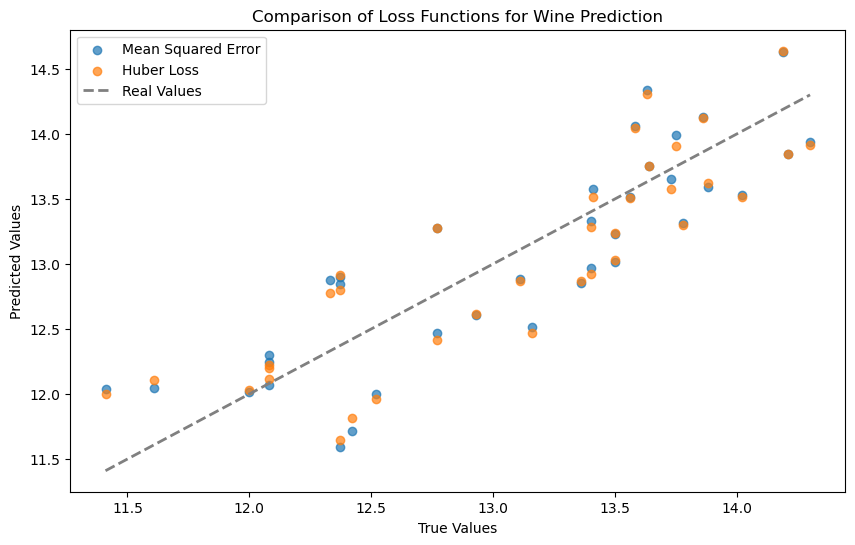

In [62]:
# Plotting

# Create a scatter plot for Mean Squared Error
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='Mean Squared Error', alpha=0.7)

# Create a scatter plot for Huber loss
plt.scatter(y_test, y_predHuber, label='Huber Loss', alpha=0.7)

# Plot the diagonal line (real values)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', linewidth=2, label='Real Values')

plt.title('Comparison of Loss Functions for Wine Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [63]:
# Print classification report to look at precision, recall and f1-score for the MSE Loss function

#Making my y_pred a whole number of the same type as y_test
y_test = y_test.astype(int)
y_pred = np.round(y_pred).astype(int)

print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

          11       1.00      0.00      0.00         2
          12       0.80      0.62      0.70        13
          13       0.62      0.47      0.53        17
          14       0.25      0.75      0.38         4
          15       0.00      1.00      0.00         0

    accuracy                           0.53        36
   macro avg       0.53      0.57      0.32        36
weighted avg       0.66      0.53      0.54        36



In [64]:
# Print classification report to look at precision, recall and f1-score for the Huber Loss function

#Making my y_predHuber a whole number of the same type as y_test
y_test = y_test.astype(int)
y_predHuber = np.round(y_predHuber).astype(int)

print(classification_report(y_test, y_predHuber, zero_division=1))

              precision    recall  f1-score   support

          11       1.00      0.00      0.00         2
          12       0.73      0.62      0.67        13
          13       0.58      0.41      0.48        17
          14       0.25      0.75      0.38         4
          15       0.00      1.00      0.00         0

    accuracy                           0.50        36
   macro avg       0.51      0.56      0.30        36
weighted avg       0.62      0.50      0.51        36



**Conclusions for Loss functions and their evaluation:**

From the start we can tell that both of our loss functions offer a relativelly small error while having a high R2 which is indicative of a good fit.

When plotting them in a scatter plot we see that they are actually pretty close to the true difference between the predicted data and the real data. 

In terms of precision, recall and f1-score, we see that MSE is a better fit. Arriving at the correct response aproximately 2/3 of the time.

## Creating a scenario for overfitting of a linear dataset

In [65]:
#In order to create a scenario where overfitting is likely to occur, we will randomly reduce the number of samples in the wine data. 

#Performing a regression model on many input variables and too few observations may result in the model performing poorly due to overfitting 
#Overfitting occurs when a model performs well on the training data but poorly on the test data due to a high variance between model estimates for different samples of data 
#To accomplish this, we will use only a fraction of the data

# Use only a fraction of the training data
X_train_subset = X_train[:20]
y_train_subset = y_train[:20]

# Split the data with a smaller test size
X_train, X_test, y_train, y_test = train_test_split(X_train_subset, y_train_subset, test_size=0.2, random_state=42)

# Train the model
model_overfit = LinearRegression()
model_overfit.fit(X_train, y_train)

# Predictions
y_train_pred = model_overfit.predict(X_train)
y_val_pred = model_overfit.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_test, y_val_pred)

print(f'Mean Squared Error on Training Set: {mse_train}')
print(f'Mean Squared Error on Validation Set: {mse_val}')



Mean Squared Error on Training Set: 0.005167240184764775
Mean Squared Error on Validation Set: 4.069662607594538


## Regularization for scenario of overfitting of a linear dataset

In [66]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0) 
ridge_model.fit(X_train, y_train)
y_test_pred_ridge = ridge_model.predict(X_test)
mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)

# Lasso Regression
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)
y_test_pred_lasso = lasso_model.predict(X_test)
mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)

print(f'Mean Squared Error on Test Set (Ridge): {mse_test_ridge}')
print(f'Mean Squared Error on Test Set (Lasso): {mse_test_lasso}')


Mean Squared Error on Test Set (Ridge): 1.1929128309074681
Mean Squared Error on Test Set (Lasso): 1.6157256729589666


In [67]:
# The high MSE on the validation set can be a sign of overfitting. The model may be capturing noise in the training data or may be relying on too small a sample.

**Conclusion on overfitting and regularization for Wine dataset:**

The high MSE on the testset of our adjusted model can be a sign of overfitting. The model may be capturing noise in the training data or may be relying on too small a sample.

After applying the regularizatiopn techniques, we see that the mean squared error for the test set reduces with both Ridge and Lasso regularization methods. We can conclude that both pof these regularization methods help reduce overfitting and improve model generalization.

## Decision Tree - with and without pruning

MSE without pruning on wine dataset: 0.3800833333333335
MSE with pruning on wine dataset: 0.13922371449122906


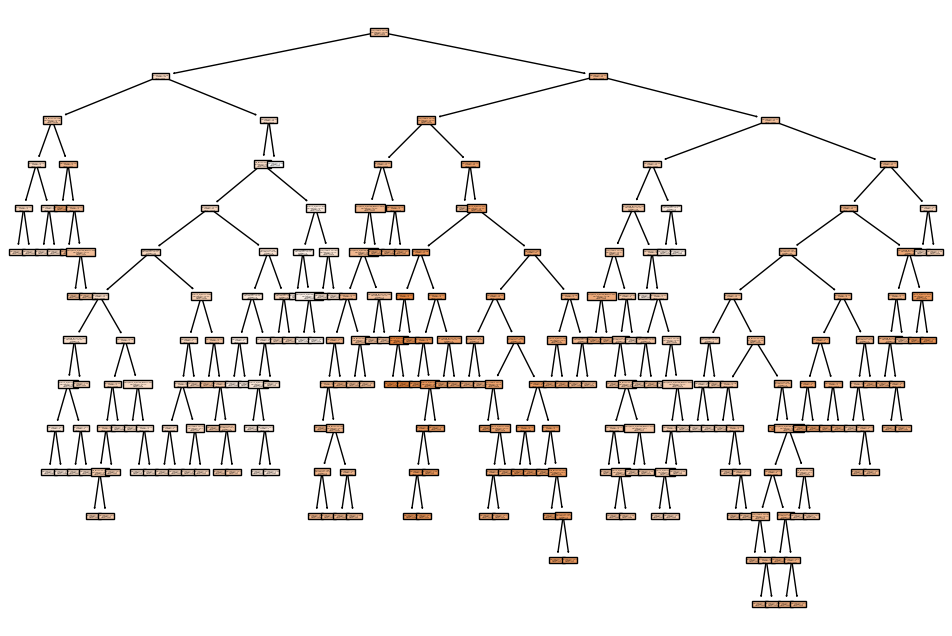

In [74]:
#Separate target and fearures
X_wine = dfWine.drop('alcohol', axis=1)
y_wine = dfWine['alcohol']

# Split the data into training and testing sets
X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42)


# Define Decision Tree models (without pruning and with pruning)
tree_model = DecisionTreeRegressor(random_state=42)
pruned_tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)

# Fit both the tree models
tree_model.fit(X_wine_train, y_wine_train)
pruned_tree_model.fit(X_wine_train, y_wine_train)

# Make predictions on both models
y_wine_pred_tree = tree_model.predict(X_wine_test)
y_wine_pred_pruned_tree = pruned_tree_model.predict(X_wine_test)

# Evaluate accuracy on both models
mse_tree_wine = mean_squared_error(y_wine_test, y_wine_pred_tree)
mse_pruned_tree_wine = mean_squared_error(y_wine_test, y_wine_pred_pruned_tree)

# Print accuracy (Mean Squared Error) for both models
print(f'MSE without pruning on wine dataset: {mse_tree_wine}')
print(f'MSE with pruning on wine dataset: {mse_pruned_tree_wine}')

# Visualize the decision tree (without pruning since it is the most accurate)
plt.figure(figsize=(12, 8))
plot_tree(tree_model, filled=True, feature_names=X_wine.columns.tolist())
plt.show()

**Conclusions on decision trees:**

We can conclude that once we prune the tree we can reduce the MSE.

The lower MSE (0.1392) compared to the model without pruning suggests that pruning has improved the model's performance on the test set. Pruning helps prevent overfitting, leading to a more generalized model.

In this case, pruning has led to a more robust and generalizable model for predicting wine alcohol content.

# 3.4 MASTER (CELLPHONE) - ANALYSIS

Since all variables are continuous, except prolione which is discrete, we started out by correlation matrix and a heat map. This will allow us to detect linearity between variables with a high correlation. We can later confirm this by plotting scatter plots between those variables. (exploratory analysis technique)

We did identify linearity between some variables so to explore further and even to set up the base for a predictive model we conducted a multiple regression model. We also plotted the residuals against the fitted model (inferential analysis techniques).

                               Year       Age  GenderNum  AutismQuotient  \
Year                       1.000000  0.021229   0.004100        0.087059   
Age                        0.021229  1.000000  -0.006275       -0.054856   
GenderNum                  0.004100 -0.006275   1.000000       -0.049996   
AutismQuotient             0.087059 -0.054856  -0.049996        1.000000   
STAI                       0.067843 -0.117021   0.103621        0.255425   
BRIEF_Total                0.108651 -0.074986   0.032155        0.297901   
DailyAvgMins              -0.055887 -0.149204   0.050957       -0.020248   
DailyAvePickups            0.306103 -0.330445   0.074474        0.091234   
VS_RT_correct_Conjunction  0.029299  0.334541  -0.016801       -0.005033   
VS_RT_correct_Single       0.056883  0.319380  -0.002073       -0.011153   

                               STAI  BRIEF_Total  DailyAvgMins  \
Year                       0.067843     0.108651     -0.055887   
Age                       -0.11

<function matplotlib.pyplot.show(close=None, block=None)>

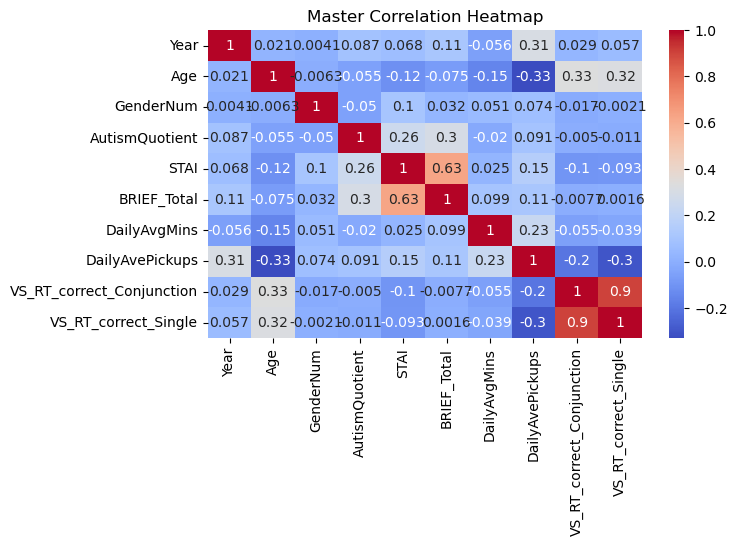

In [69]:
dataMaster = ['Device','filename']

# Exclude columns to ignore from the correlation matrix
columns_for_correlation = [col for col in dfMaster.columns if col not in dataMaster]
correlation_matrixMaster = dfMaster[columns_for_correlation].corr()
print(correlation_matrixMaster)
plt.figure(figsize=(7, 4))
sns.heatmap(correlation_matrixMaster, xticklabels=correlation_matrixMaster.columns, yticklabels=correlation_matrixMaster.columns, cmap='coolwarm', annot=True)
plt.title("Master Correlation Heatmap")
plt.show

## Open to view all scatter plots for correlations above 0.6

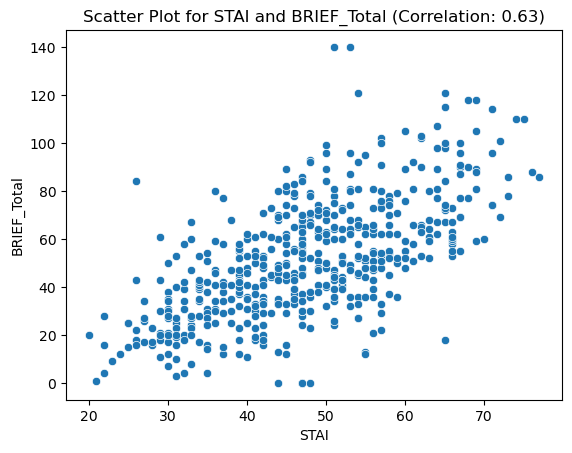

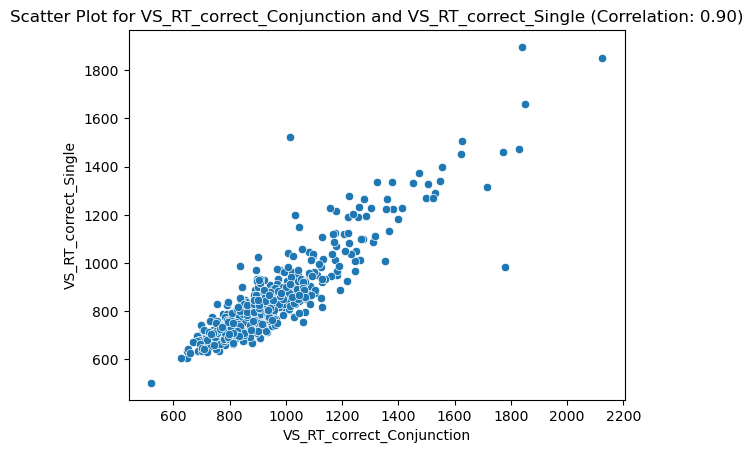

In [70]:
# Iterate over pairs of columns and make scatter plots for correlations above the threshold

# Set your correlation threshold (adjust as needed)
correlation_threshold = 0.6

for i in range(len(correlation_matrixMaster.columns)):
    for j in range(i + 1, len(correlation_matrixMaster.columns)):
        correlation_value = correlation_matrixMaster.iloc[i, j]
        if abs(correlation_value) > correlation_threshold:
            sns.scatterplot(x=correlation_matrixMaster.columns[i], y=correlation_matrixMaster.columns[j], data=dfMaster)
            plt.title(f"Scatter Plot for {correlation_matrixMaster.columns[i]} and {correlation_matrixMaster.columns[j]} (Correlation: {correlation_value:.2f})")
            plt.show()

**Conclusions on linearity:**

We can conclude that several variables seem to have a linear relationship which is clearly detailed in our scatter plots.

In [71]:
# We won't conduct regressions (linear or multiple) because we've already done them for the previous task of this assignment

**Decision trees**

MSE without pruning on master dataset: 18302.029138529986
MSE with pruning on master dataset: 18195.000082772487


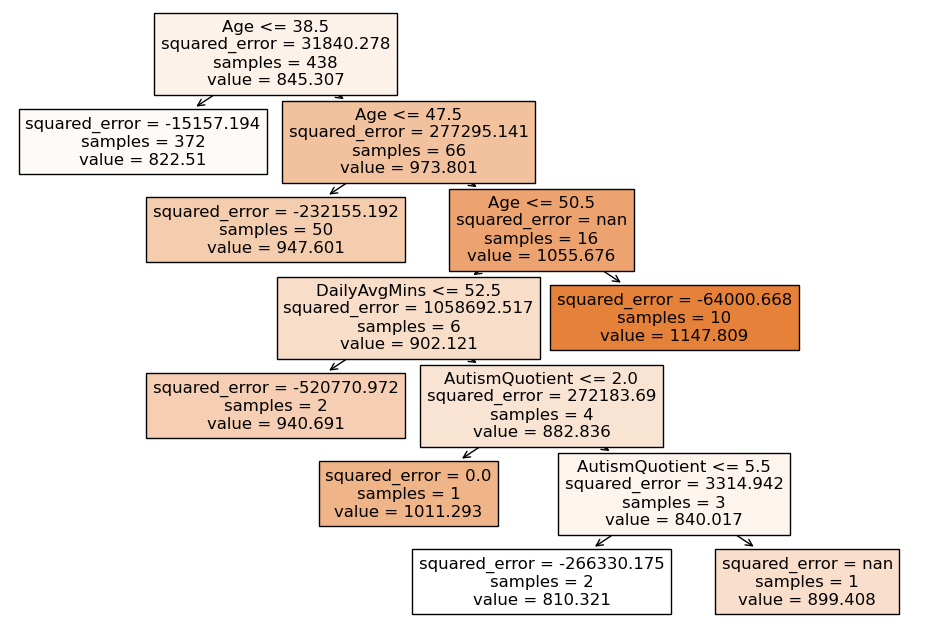

In [75]:
# Split datasets into features (X) and target variable (y)
X_master = dfMaster.drop(['VS_RT_correct_Single','VS_RT_correct_Conjunction'], axis=1)
y_master = dfMaster['VS_RT_correct_Single']

# Split datasets into training and testing sets
X_master_train, X_master_test, y_master_train, y_master_test = train_test_split(X_master, y_master, test_size=0.2, random_state=42)

# Define Decision Tree models (without pruning and with pruning)
tree_model_master = DecisionTreeRegressor(random_state=42)
pruned_tree_model_master = DecisionTreeRegressor(max_depth=5, random_state=42)

# Fit both the tree models
tree_model_master.fit(X_master_train, y_master_train)
pruned_tree_model_master.fit(X_master_train, y_master_train)

# Make predictions on both models
y_master_pred_tree = tree_model_master.predict(X_master_test)
y_master_pred_pruned_tree = pruned_tree_model_master.predict(X_master_test)

# Evaluate accuracy on both models
mse_tree_master = mean_squared_error(y_master_test, y_master_pred_tree)
mse_pruned_tree_master = mean_squared_error(y_master_test, y_master_pred_pruned_tree)

# Print accuracy (Mean Squared Error) for both models
print(f'MSE without pruning on master dataset: {mse_tree_master}')
print(f'MSE with pruning on master dataset: {mse_pruned_tree_master}')

# Visualize the decision tree (without pruning just as an example)
plt.figure(figsize=(12, 8))
plot_tree(tree_model_master, filled=True, feature_names=X_master.columns.tolist())
plt.show()

**Conclusions on decision trees**:

Our Decision Tree model, even with pruning, seems to have challenges in accurately predicting the target variable in this data set. The MSE values are relatively high, suggesting that the model's predictions have significant errors and are not at all appropriate.

It's possible that Decision Trees might not be the most suitable model for this dataset.

# 5. Sources

1. Analytics Vidhya. (2018, March). Introduction to K-Neighbours Algorithm (Clustering). https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/

2. Towards Data Science. (n.d.). Loss Functions and Their Use in Neural Networks. https://towardsdatascience.com/loss-functions-and-their-use-in-neural-networks-a470e703f1e9

3. Visualization of Some Loss Functions for Deep Learning with TensorFlow:
Rising Developer. (n.d.). Visualization of Some Loss Functions for Deep Learning with TensorFlow. https://medium.com/@risingdeveloper/visualization-of-some-loss-functions-for-deep-learning-with-tensorflow-9f60be9d09f9

4. Analytics Vidhya. (2022, June). Understanding Loss Function in Deep Learning. https://www.analyticsvidhya.com/blog/2022/06/understanding-loss-function-in-deep-learning/#h-1-mean-squared-error-squared-loss-l2-loss

5. Analytics Vidhya. (2020, June). Introduction to ANOVA Statistics in Data Science (COVID-19). https://www.analyticsvidhya.com/blog/2020/06/introduction-anova-statistics-data-science-covid-python/

6. Machine Learning Mastery. (n.d.). Precision, Recall, and F-Measure for Imbalanced Classification. https://machinelearningmastery.com/precision-recall-and-f-measure-for-imbalanced-classification/

7. Encord. (n.d.). Measure Model Performance in Computer Vision. https://encord.com/blog/measure-model-performance-computer-vision/

8. Analytics Vidhya. (2020, April). Confusion Matrix in Machine Learning. https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/?utm_source=reading_list&utm_medium=https://www.analyticsvidhya.com/blog/2019/08/detailed-guide-7-loss-functions-machine-learning-python-code/#Confusion_Matrix_Using_Scikit-learn_in_Python

9. Encord. (n.d.). Measure Model Performance in Computer Vision. https://encord.com/blog/measure-model-performance-computer-vision/

10. Chat GPT 3.5
